<a href="https://colab.research.google.com/github/mefyqoje/kurs/blob/main/projectcity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from scipy.stats import pearsonr, spearmanr
import matplotlib.gridspec as gridspec

In [ ]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

### Вывод

Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Предобработка данных

Если пользователь не указал балкон, то берем значение '0' (скорее всего балкона просто нет). Такая же ситуация с парками и водоемами.

In [ ]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      0.0  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      0.0  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

Проверяем явные дубликаты.

In [ ]:
df.duplicated().sum()

np.int64(0)

Заполняем значениями 'False' отсутсвующие данные об аппартаментах.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

/tmp/ipython-input-46-2012338393.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = df['is_apartment'].fillna(False)


array([False,  True])

Если пользователь не указал значения расстояний да водоема или парка, то ставим значение '3000', тк у большинства из них значение '0' в столбцах про количество парков и водоемов в радиусе 3000 метров.
Остальные значения заполняем медианными, тк нет какой-либо дополнительной информации.

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
df['living_area'] = df['living_area'].fillna(df['living_area'].mean())
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean())
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].mean())
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].mean())
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].mean())
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean())
df['parks_nearest'] = df['parks_nearest'].fillna(3000)
df['ponds_nearest'] = df['ponds_nearest'].fillna(3000)


Переводим значения цены, площади, жилой площади, кухонной площади, количество балконов/этажей/водоемов/парков, метров до аэропорта/центра/парка/водоема в тип `int`, поскольку нет надобности в большей точности.

In [ ]:
df['last_price'] = df['last_price'].astype('int')
df['total_area'] = df['total_area'].astype('int')
df['living_area'] = df['living_area'].astype('int')
df['kitchen_area'] = df['kitchen_area'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df.head()


total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108  2019-03-07T00:00:00      3   
1             7     3350000          40  2018-12-04T00:00:00      1   
2            10     5196000          56  2015-08-20T00:00:00      2   
3             0    64900000         159  2015-07-24T00:00:00      3   
4             2    10000000         100  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16           51      8         False  ...   
1        2.771499            11           18      1         False  ...   
2        2.771499             5           34      4         False  ...   
3        2.771499            14           34      9         False  ...   
4        3.030000            14           32     13         False  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0            25        0  Санкт-Петербург             18863   
1            11        2   посёлок Шушары             12817   
2             8        0  Санкт-Петербург             21741   
3            10        0  Санкт-Петербург             28098   
4            41        0  Санкт-Петербург             31856   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028                 1            482                 2   
1               18603                 0           3000                 0   
2               13933                 1             90                 2   
3                6800                 2             84                 3   
4                8098                 2            112                 1   

   ponds_nearest  days_exposition  
0            755              180  
1           3000               81  
2            574              558  
3            234              424  
4             48              121  

[5 rows x 22 columns]

In [ ]:
df.isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           49
airports_nearest         0
cityCenters_nearest      0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  int64  
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  int64  
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Расчёты и добавление результатов в таблицу

Считаем стоимость за квадратный метр.

In [ ]:
df['price_per_area'] = df['last_price'] / df['total_area']
df['price_per_area'] = df['price_per_area'].astype('int')
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108  2019-03-07T00:00:00      3   
1             7     3350000          40  2018-12-04T00:00:00      1   
2            10     5196000          56  2015-08-20T00:00:00      2   
3             0    64900000         159  2015-07-24T00:00:00      3   
4             2    10000000         100  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16           51      8         False  ...   
1        2.771499            11           18      1         False  ...   
2        2.771499             5           34      4         False  ...   
3        2.771499            14           34      9         False  ...   
4        3.030000            14           32     13         False  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0        0  Санкт-Петербург             18863                16028   
1        2   посёлок Шушары             12817                18603   
2        0  Санкт-Петербург             21741                13933   
3        0  Санкт-Петербург             28098                 6800   
4        0  Санкт-Петербург             31856                 8098   

  parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0                1            482                 2            755   
1                0           3000                 0           3000   
2                1             90                 2            574   
3                2             84                 3            234   
4                2            112                 1             48   

   days_exposition  price_per_area  
0              180          120370  
1               81           83750  
2              558           92785  
3              424          408176  
4              121          100000  

[5 rows x 23 columns]

Посчитаем дату, когда объявление было опубликовано.

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday_name'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16           51      8         False  ...   
1        2.771499            11           18      1         False  ...   
2        2.771499             5           34      4         False  ...   
3        2.771499            14           34      9         False  ...   
4        3.030000            14           32     13         False  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0                 1            482                 2            755   
1                 0           3000                 0           3000   
2                 1             90                 2            574   
3                 2             84                 3            234   
4                 2            112                 1             48   

  days_exposition  price_per_area  weekday  weekday_name  month  year  
0             180          120370        3      Thursday      3  2019  
1              81           83750        1       Tuesday     12  2018  
2             558           92785        3      Thursday      8  2015  
3             424          408176        4        Friday      7  2015  
4             121          100000        1       Tuesday      6  2018  

[5 rows x 27 columns]

Добавим столбец про этаж квартиры со значениями:

1.   Первый
2.   Последний
3.   Другой



In [ ]:
condition_first = (df['floor'] == 1)
condition_last = (df['floor'] == df['floors_total'])

df['floor_type'] = np.select(
    [condition_first, condition_last],
    ['первый', 'последний'],
    default='другой'
)
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16           51      8         False  ...   
1        2.771499            11           18      1         False  ...   
2        2.771499             5           34      4         False  ...   
3        2.771499            14           34      9         False  ...   
4        3.030000            14           32     13         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0            482                 2            755              180   
1           3000                 0           3000               81   
2             90                 2            574              558   
3             84                 3            234              424   
4            112                 1             48              121   

  price_per_area  weekday  weekday_name  month  year  floor_type  
0         120370        3      Thursday      3  2019      другой  
1          83750        1       Tuesday     12  2018      первый  
2          92785        3      Thursday      8  2015      другой  
3         408176        4        Friday      7  2015      другой  
4         100000        1       Tuesday      6  2018      другой  

[5 rows x 28 columns]

Добавим соотношение площадей жилой и кухни к общей

In [ ]:
df['living_total'] = df['living_area'] / df['total_area']
df['kitchen_total'] = df['kitchen_area'] / df['total_area']
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16           51      8         False  ...   
1        2.771499            11           18      1         False  ...   
2        2.771499             5           34      4         False  ...   
3        2.771499            14           34      9         False  ...   
4        3.030000            14           32     13         False  ...   

   ponds_nearest  days_exposition  price_per_area  weekday weekday_name  \
0            755              180          120370        3     Thursday   
1           3000               81           83750        1      Tuesday   
2            574              558           92785        3     Thursday   
3            234              424          408176        4       Friday   
4             48              121          100000        1      Tuesday   

   month  year  floor_type  living_total  kitchen_total  
0      3  2019      другой      0.472222       0.231481  
1     12  2018      первый      0.450000       0.275000  
2      8  2015      другой      0.607143       0.142857  
3      7  2015      другой      0.213836       0.062893  
4      6  2018      другой      0.320000       0.410000  

[5 rows x 30 columns]

## Исследовательский анализ данных

Построим графики распределения площади/стоимости/комнат/высоты потолков

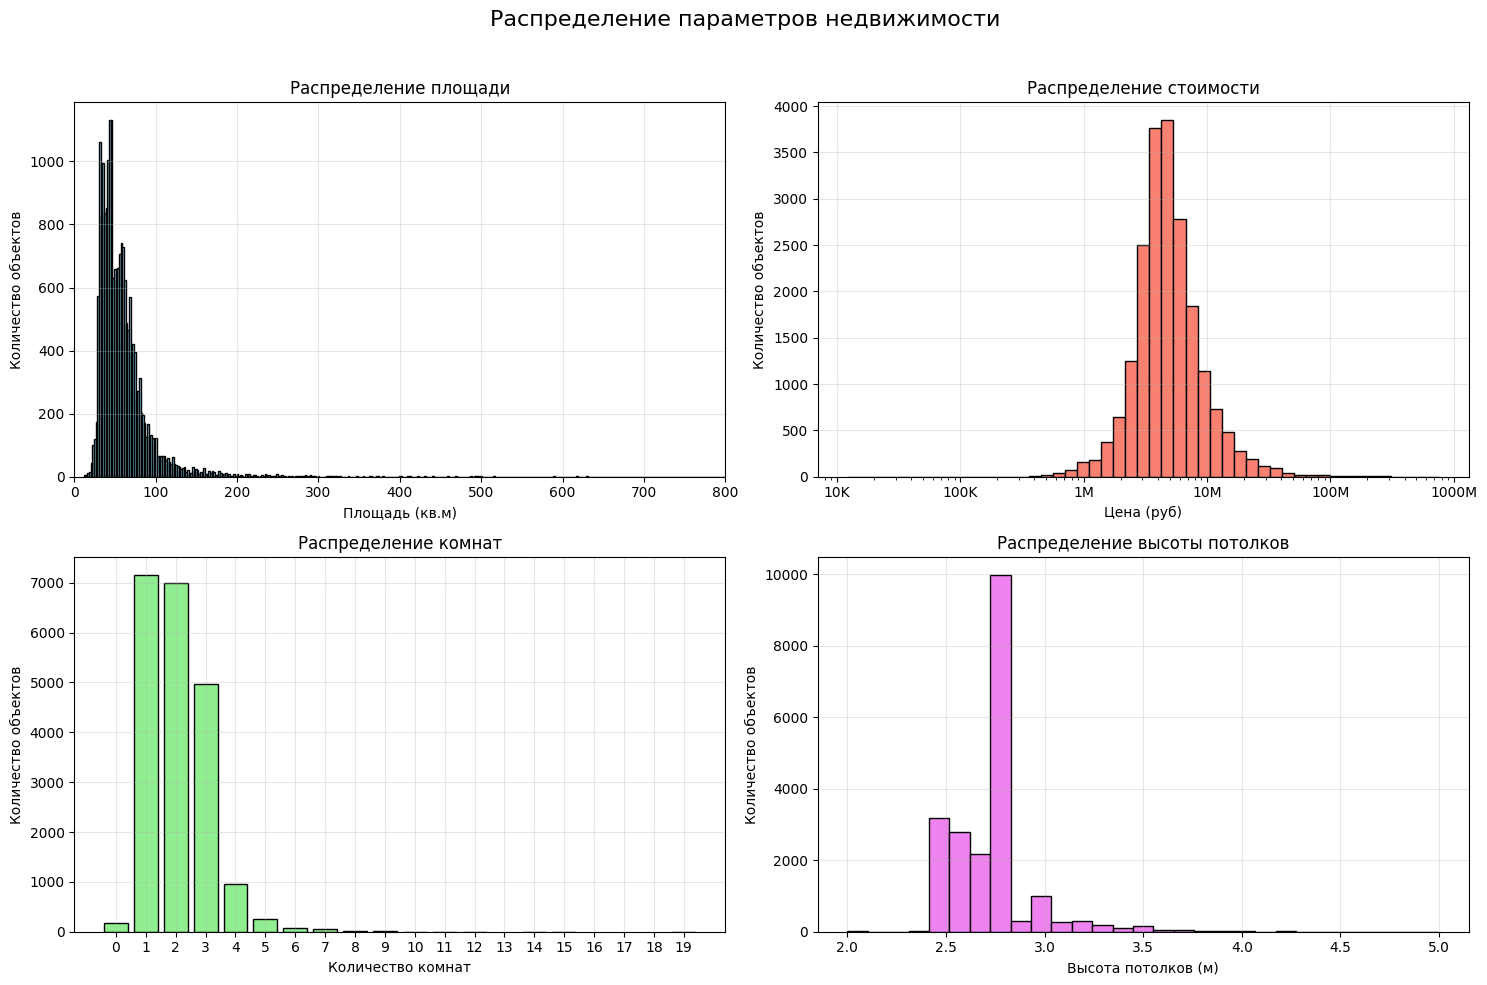

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем фигуру с 4 субграфиками
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Распределение параметров недвижимости', fontsize=16)

# 1. Гистограмма для площади (оптимизация для длинного хвоста)
area_bins = np.histogram_bin_edges(df['total_area'], bins='auto')
axes[0, 0].hist(df['total_area'], bins=area_bins, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Распределение площади')
axes[0, 0].set_xlabel('Площадь (кв.м)')
axes[0, 0].set_ylabel('Количество объектов')
axes[0, 0].set_xlim(0, 800)  # Ограничение для лучшей видимости основного распределения
axes[0, 0].grid(True, alpha=0.3)

# 2. Гистограмма для цены (оптимизация для больших значений)
price_bins = np.logspace(np.log10(df['last_price'].min()),
                         np.log10(df['last_price'].max()),
                         50)
axes[0, 1].hist(df['last_price'], bins=price_bins, color='salmon', edgecolor='black')
axes[0, 1].set_title('Распределение стоимости')
axes[0, 1].set_xlabel('Цена (руб)')
axes[0, 1].set_ylabel('Количество объектов')
axes[0, 1].set_xscale('log')  # Логарифмическая шкала
axes[0, 1].grid(True, alpha=0.3)

# Форматирование цен в читаемый вид
def format_currency(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    return f'{x/1e3:.0f}K'

axes[0, 1].xaxis.set_major_formatter(format_currency)

# 3. Гистограмма для количества комнат (улучшенная)
room_counts = df['rooms'].value_counts().sort_index()
axes[1, 0].bar(room_counts.index, room_counts.values,
               color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Распределение комнат')
axes[1, 0].set_xlabel('Количество комнат')
axes[1, 0].set_ylabel('Количество объектов')
axes[1, 0].set_xticks(range(int(room_counts.index.min()),
                      int(room_counts.index.max())+1))
axes[1, 0].grid(True, alpha=0.3)

# 4. Гистограмма для высоты потолков (с фильтрацией выбросов)
valid_heights = df['ceiling_height'][(df['ceiling_height'] >= 2) &
                                    (df['ceiling_height'] <= 5)]
height_bins = np.linspace(2, 5, 30)

axes[1, 1].hist(valid_heights, bins=height_bins,
               color='violet', edgecolor='black')
axes[1, 1].set_title('Распределение высоты потолков')
axes[1, 1].set_xlabel('Высота потолков (м)')
axes[1, 1].set_ylabel('Количество объектов')
axes[1, 1].grid(True, alpha=0.3)

# Настройка отступов и отображение
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('rasp.png', dpi=300)
plt.show()

Построим распределение времени продажи квартиры

Среднее время продажи: 116.6 дней
Медианное время продажи: 97.0 дней

Перцентили:
0.10     17.0
0.25     45.0
0.75    180.0
0.90    232.0
Name: days_exposition, dtype: float64


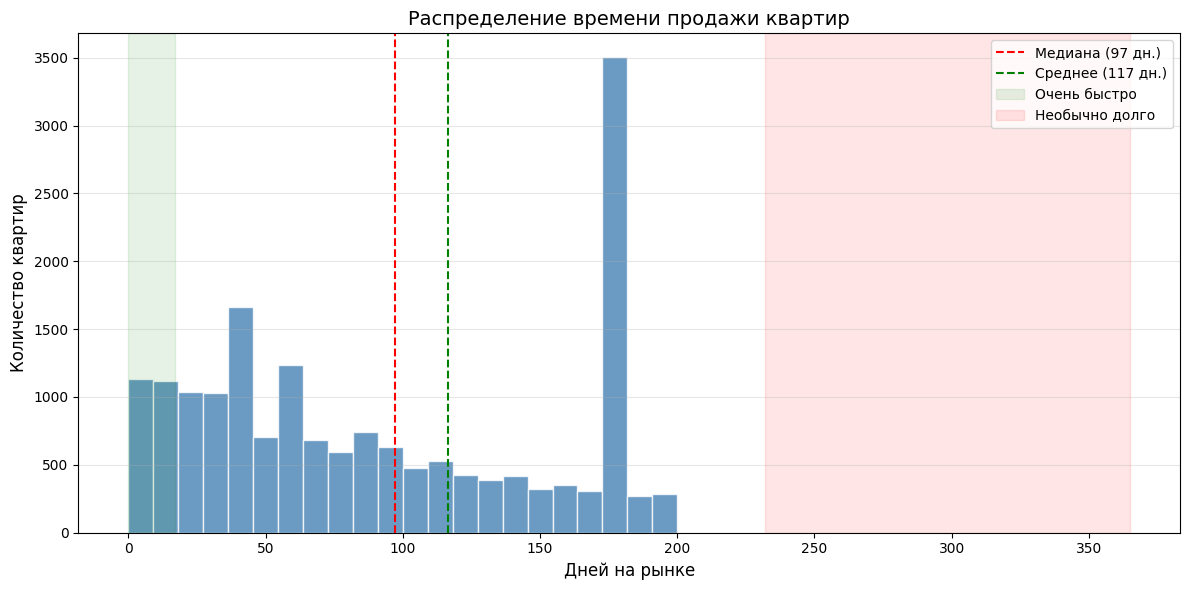


Характеристики быстрых продаж:
         last_price   total_area        rooms
count  2.118000e+03  2118.000000  2118.000000
mean   5.491154e+06    53.306893     1.850803
std    5.486702e+06    31.418688     0.998547
min    1.219000e+04    13.000000     0.000000
25%    3.471750e+06    37.000000     1.000000
50%    4.400000e+06    46.000000     2.000000
75%    5.950000e+06    61.000000     2.000000
max    9.500000e+07   590.000000    15.000000

Характеристики долгих продаж:
         last_price   total_area        rooms
count  2.090000e+03  2090.000000  2090.000000
mean   7.110160e+06    63.181340     2.155502
std    1.323623e+07    37.714532     1.097554
min    4.500000e+05    20.000000     0.000000
25%    3.403250e+06    41.000000     1.000000
50%    4.685000e+06    54.000000     2.000000
75%    6.990000e+06    73.000000     3.000000
max    3.300000e+08   500.000000     8.000000


In [ ]:
# Фильтрация некорректных значений
df = df[(df['days_exposition'] >= 0) & (df['days_exposition'] <= 365)]

# Основные статистики
mean_days = df['days_exposition'].mean()
median_days = df['days_exposition'].median()

print(f"Среднее время продажи: {mean_days:.1f} дней")
print(f"Медианное время продажи: {median_days:.1f} дней")

# Расчет перцентилей
percentiles = df['days_exposition'].quantile([0.10, 0.25, 0.75, 0.90])
print("\nПерцентили:")
print(percentiles)

plt.figure(figsize=(12, 6))

# Оптимальные бины с фокусом на основной диапазон
bins = np.histogram_bin_edges(df['days_exposition'], bins='auto', range=(0, 200))

# Построение гистограммы
plt.hist(df['days_exposition'], bins=bins, color='steelblue', edgecolor='white', alpha=0.8)

# Разметка и оформление
plt.title('Распределение времени продажи квартир', fontsize=14)
plt.xlabel('Дней на рынке', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Вертикальные линии для статистик
plt.axvline(median_days, color='red', linestyle='dashed', linewidth=1.5, label=f'Медиана ({median_days:.0f} дн.)')
plt.axvline(mean_days, color='green', linestyle='dashed', linewidth=1.5, label=f'Среднее ({mean_days:.0f} дн.)')

# Области быстрых и долгих продаж
plt.axvspan(0, percentiles[0.10], color='green', alpha=0.1, label='Очень быстро')
plt.axvspan(percentiles[0.90], 365, color='red', alpha=0.1, label='Необычно долго')

plt.legend()
plt.tight_layout()
plt.savefig('days.png', dpi=300)
plt.show()

# Анализ факторов быстрых/долгих продаж
fast_sales = df[df['days_exposition'] <= percentiles[0.10]]
slow_sales = df[df['days_exposition'] >= percentiles[0.90]]

print("\nХарактеристики быстрых продаж:")
print(fast_sales[['last_price', 'total_area', 'rooms']].describe())

print("\nХарактеристики долгих продаж:")
print(slow_sales[['last_price', 'total_area', 'rooms']].describe())

Уберем редкие и выбивающиеся значения, например, `15 < площадь < 300` или `2.2 < высота потолков < 4.0`

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_outliers_percentile(df, column, lower=0.01, upper=0.99):
    low = df[column].quantile(lower)
    high = df[column].quantile(upper)
    return df[(df[column] >= low) & (df[column] <= high)]

def clean_data(df):
    # Фиксированные пороги
    df = df[(df['total_area'] >= 15) & (df['total_area'] <= 300)]
    df = df[(df['ceiling_height'] >= 2.2) & (df['ceiling_height'] <= 4.0)]

    # Статистические методы
    df = remove_outliers_iqr(df, 'last_price')
    df = remove_outliers_iqr(df, 'rooms')

    # Для времени продажи используем перцентили
    df = remove_outliers_percentile(df, 'days_exposition', 0.05, 0.95)

    return df

df_clean = clean_data(df)

In [ ]:
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
4             2    10000000         100           2018-06-19      2   
5            10     2890000          30           2018-09-10      1   
6             6     3700000          37           2017-11-02      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0        2.700000            16           51      8         False  ...   
1        2.771499            11           18      1         False  ...   
4        3.030000            14           32     13         False  ...   
5        2.771499            12           14      5         False  ...   
6        2.771499            26           10      6         False  ...   

   ponds_nearest  days_exposition  price_per_area  weekday weekday_name  \
0            755              180          120370        3     Thursday   
1           3000               81           83750        1      Tuesday   
4             48              121          100000        1      Tuesday   
5           3000               55           96333        0       Monday   
6           3000              155          100000        3     Thursday   

   month  year  floor_type  living_total  kitchen_total  
0      3  2019      другой      0.472222       0.231481  
1     12  2018      первый      0.450000       0.275000  
4      6  2018      другой      0.320000       0.410000  
5      9  2018      другой      0.466667       0.300000  
6     11  2017      другой      0.270270       0.378378  

[5 rows x 30 columns]

Далее построим графики зависимости цены от различных показателей

/tmp/ipython-input-91-662513842.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rooms', y='price_per_area', data=room_medians,
/tmp/ipython-input-91-662513842.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


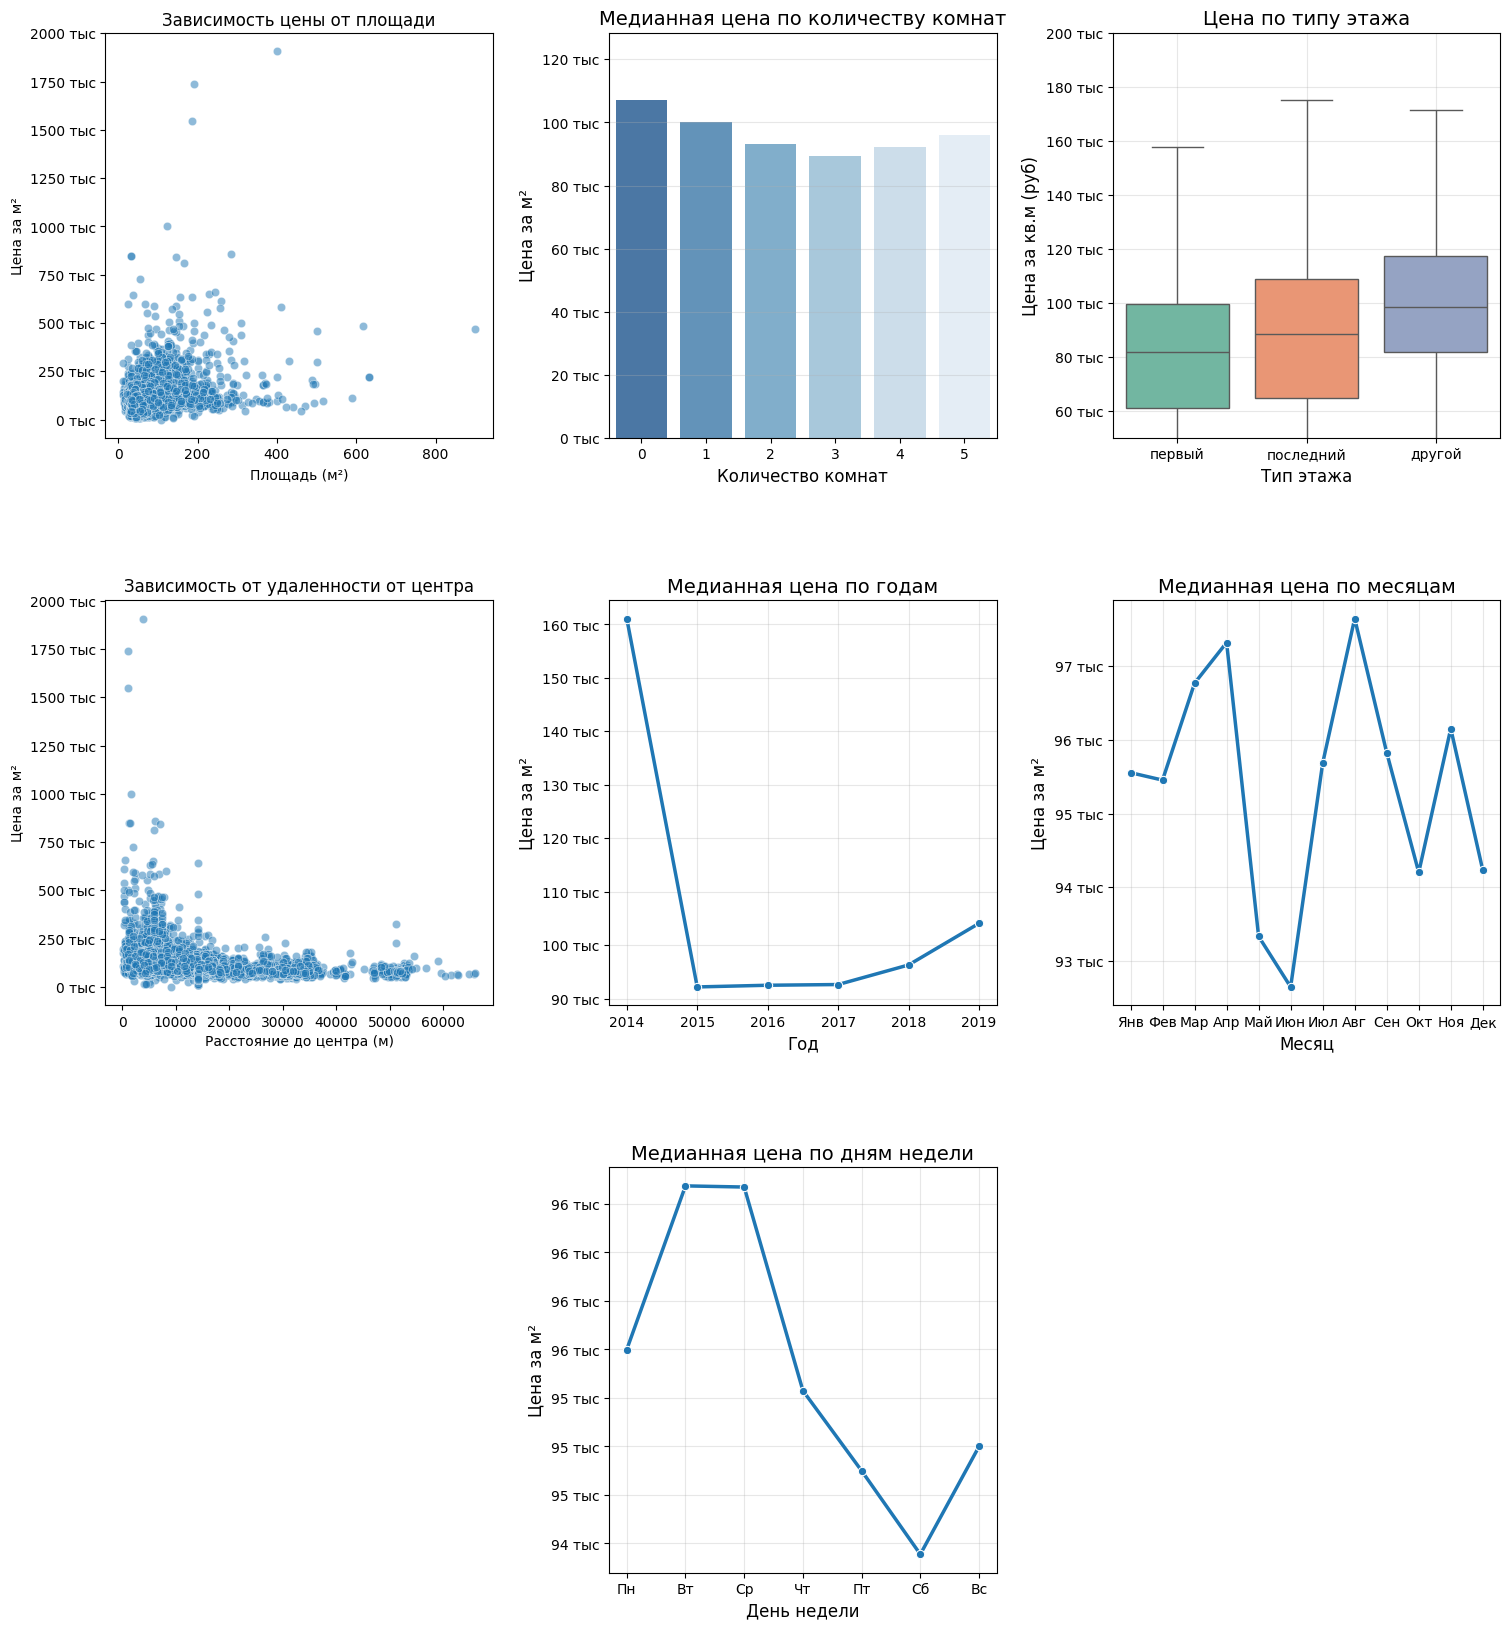

In [ ]:
# Создаем фигуру с сеткой
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.3)

# 1. Зависимость цены от площади
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(x='total_area', y='price_per_area', data=df, alpha=0.5, ax=ax1)
ax1.set_title('Зависимость цены от площади')
ax1.set_xlabel('Площадь (м²)')
ax1.set_ylabel('Цена за м²')
corr_area, _ = pearsonr(df['total_area'], df['price_per_area'])
ax1.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 2. Зависимость цены от количества комнат
ax2 = fig.add_subplot(gs[0, 1])
# Группируем данные
room_medians = df[df['rooms'] <= 5].groupby('rooms')['price_per_area'].median().reset_index()
# Строим столбчатую диаграмму
sns.barplot(x='rooms', y='price_per_area', data=room_medians,
           palette='Blues_r', alpha=0.8, ax=ax2)

ax2.set_title('Медианная цена по количеству комнат', fontsize=14)
ax2.set_xlabel('Количество комнат', fontsize=12)
ax2.set_ylabel('Цена за м²', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
ax2.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")
ax2.set_ylim(0, room_medians['price_per_area'].max() * 1.2)

# 3. Цена по типу этажа
ax3 = fig.add_subplot(gs[0, 2])
sns.boxplot(
    x='floor_type',
    y='price_per_area',
    data=df,
    order=['первый', 'последний', 'другой'],
    palette='Set2',
    showfliers=False,
    ax=ax3
)
ax3.set_title('Цена по типу этажа', fontsize=14)
ax3.set_xlabel('Тип этажа', fontsize=12)
ax3.set_ylabel('Цена за кв.м (руб)', fontsize=12)
ax3.set_ylim(50_000, 200_000)
ax3.grid(True, alpha=0.3)
ax3.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 4. Зависимость от удаленности от центра
ax4 = fig.add_subplot(gs[1, 0])
sns.scatterplot(x='cityCenters_nearest', y='price_per_area', data=df, alpha=0.5, ax=ax4)
ax4.set_title('Зависимость от удаленности от центра')
ax4.set_xlabel('Расстояние до центра (м)')
ax4.set_ylabel('Цена за м²')
corr_dist, _ = spearmanr(df['cityCenters_nearest'], df['price_per_area'])
ax4.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 5. Зависимость от года
ax5 = fig.add_subplot(gs[1, 1])
year_medians = df.groupby('year')['price_per_area'].median().reset_index()
sns.lineplot(x='year', y='price_per_area', data=year_medians,
            marker='o', linewidth=2.5, ax=ax5)
ax5.set_title('Медианная цена по годам', fontsize=14)
ax5.set_xlabel('Год', fontsize=12)
ax5.set_ylabel('Цена за м²', fontsize=12)
ax5.grid(True, alpha=0.3)
ax5.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 6. Зависимость от месяца
ax6 = fig.add_subplot(gs[1, 2])
month_medians = df.groupby('month')['price_per_area'].median().reset_index()
sns.lineplot(x='month', y='price_per_area', data=month_medians,
            marker='o', linewidth=2.5, sort=False, ax=ax6)
ax6.set_xticks(month_order)
ax6.set_xticklabels(['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек'])
ax6.set_title('Медианная цена по месяцам', fontsize=14)
ax6.set_xlabel('Месяц', fontsize=12)
ax6.set_ylabel('Цена за м²', fontsize=12)
ax6.grid(True, alpha=0.3)
ax6.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 7. Зависимость от дня недели
ax7 = fig.add_subplot(gs[2, 1])
weekday_medians = df.groupby('weekday')['price_per_area'].median().reset_index()
sns.lineplot(x='weekday', y='price_per_area', data=weekday_medians,
            marker='o', linewidth=2.5, ax=ax7)
ax7.set_xticks(day_order)
ax7.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
ax7.set_title('Медианная цена по дням недели', fontsize=14)
ax7.set_xlabel('День недели', fontsize=12)
ax7.set_ylabel('Цена за м²', fontsize=12)
ax7.grid(True, alpha=0.3)
ax7.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# Удаляем пустые сублоты
fig.delaxes(fig.add_subplot(gs[2, 0]))
fig.delaxes(fig.add_subplot(gs[2, 2]))

plt.savefig('all.png', dpi=300)
plt.show()

Посмотрим на цену в 10 населенных пунктах с наибольшим числом объявлений

/tmp/ipython-input-95-1061724634.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


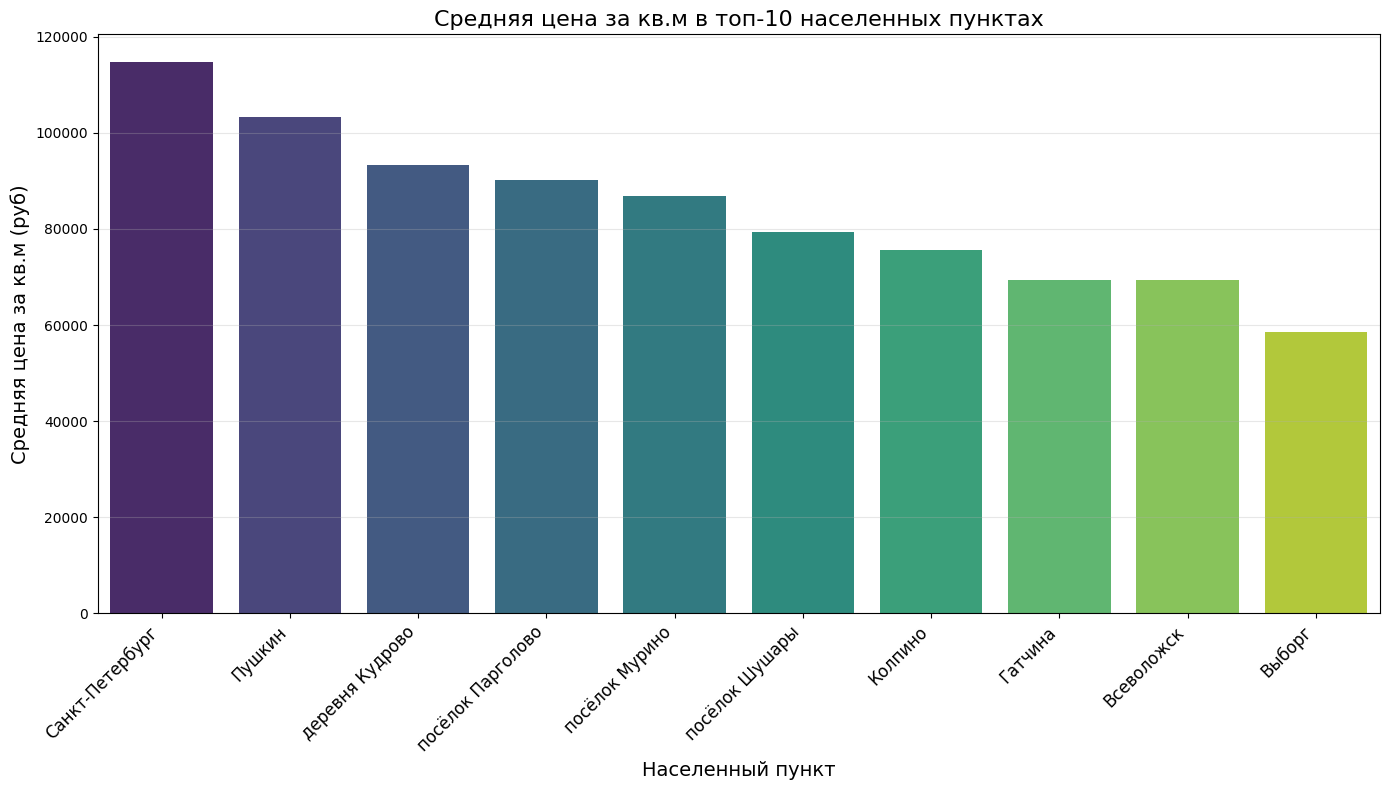

Самый дорогой населенный пункт: Санкт-Петербург
Самый дешевый населенный пункт: Выборг

Детальная статистика:
       locality_name           mean  count
0    Санкт-Петербург  114749.725721  13654
1             Пушкин  103322.206790    324
2    деревня Кудрово   93208.293436    259
3  посёлок Парголово   90214.038194    288
4     посёлок Мурино   86753.820513    468
5     посёлок Шушары   79418.918987    395
6            Колпино   75568.681967    305
7            Гатчина   69449.707692    260
8         Всеволожск   69444.592486    346
9             Выборг   58485.096154    208


In [ ]:
# 1. Выбор 10 населенных пунктов с наибольшим числом объявлений
top_localities = df['locality_name'].value_counts().head(10).index

# 2. Фильтрация данных только для этих населенных пунктов
top_df = df[df['locality_name'].isin(top_localities)]

# 3. Расчет средней цены за кв.м для каждого населенного пункта
locality_stats = top_df.groupby('locality_name')['price_per_area'].agg(
    ['mean', 'count']
).sort_values('mean', ascending=False).reset_index()

# 4. Выделение населенных пунктов с самой высокой и низкой стоимостью
highest_locality = locality_stats.iloc[0]['locality_name']
lowest_locality = locality_stats.iloc[-1]['locality_name']

# 5. Визуализация результатов
plt.figure(figsize=(14, 8))

# График средних цен
ax = sns.barplot(
    x='locality_name',
    y='mean',
    data=locality_stats,
    palette='viridis',
    order=locality_stats['locality_name']  # Порядок по убыванию цены
)

# Настройка оформления
plt.title('Средняя цена за кв.м в топ-10 населенных пунктах', fontsize=16)
plt.xlabel('Населенный пункт', fontsize=14)
plt.ylabel('Средняя цена за кв.м (руб)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('places', dpi=300)
plt.show()

# Возвращаем результаты
print(f"Самый дорогой населенный пункт: {highest_locality}")
print(f"Самый дешевый населенный пункт: {lowest_locality}")
print("\nДетальная статистика:")
print(locality_stats)

Определим для г.Санкт-Петербург центр города и зависимость цены для расттояния до центра

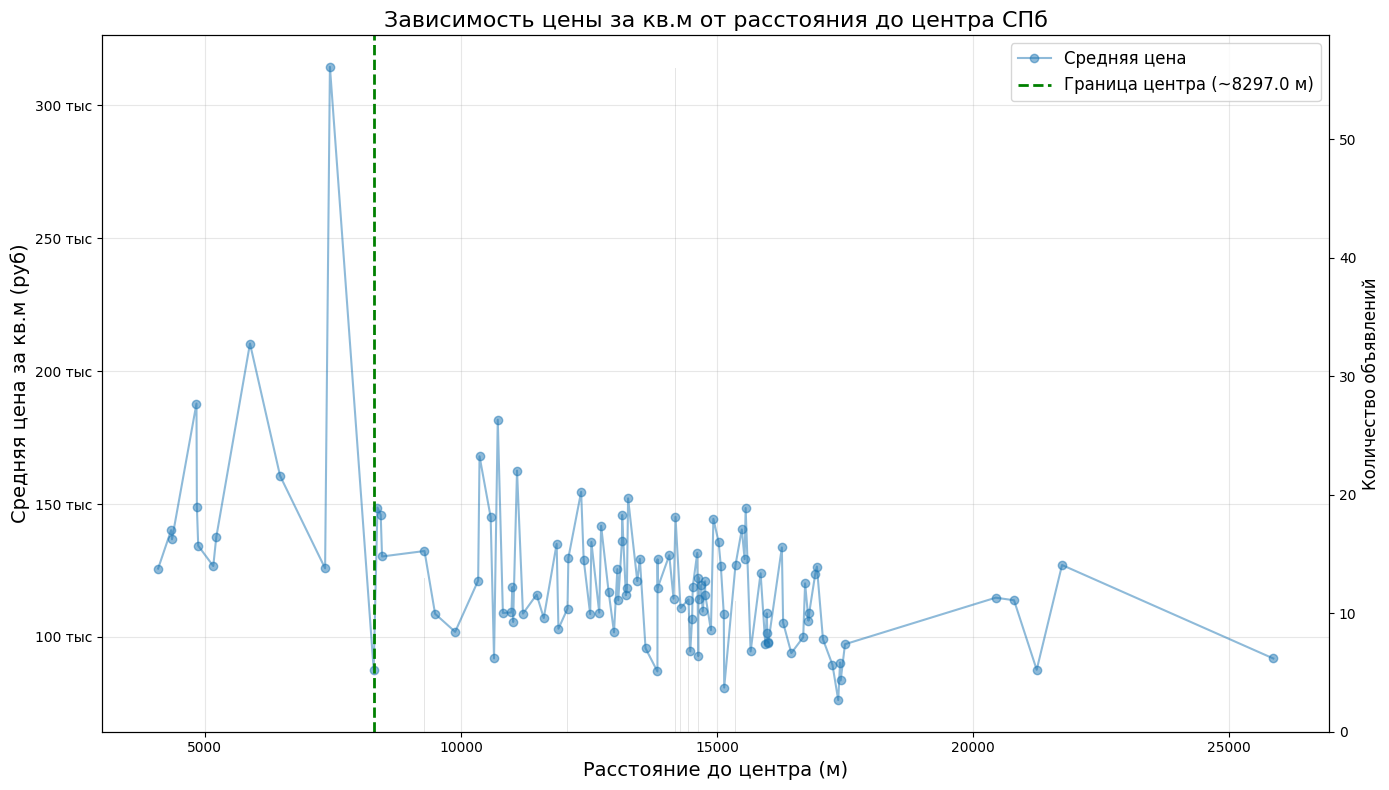

Определенная граница центральной зоны: 8297.0 км от центра

Статистика по километровым зонам:
      distance_m           mean  count           std
700         4087  125697.000000     10  25399.656209
786         4341  140159.538462     13  32455.344166
791         4358  136716.000000     12  19132.115551
966         4836  187799.857143     14  45772.636858
969         4844  148965.200000     15  24272.530165
979         4870  134286.000000     10  29711.518526
1091        5164  126653.400000     15  20331.643025
1106        5223  137566.272727     11  25935.397121
1312        5881  210397.000000     10  48728.015880
1458        6469  160596.500000     10  27793.897069


In [ ]:
from scipy.signal import savgol_filter

# 1. Фильтрация данных по Санкт-Петербургу
spb_df = df[df['locality_name'] == 'Санкт-Петербург'].copy()

# 2. Округление расстояния до центра до целых метров
spb_df['distance_m'] = spb_df['cityCenters_nearest'].round().astype(int)

# 3. Расчет средней цены за кв.м для каждого метра
distance_stats = spb_df.groupby('distance_m')['price_per_area'].agg(
    ['mean', 'count', 'std']
).reset_index()

# Фильтрация километров с малым количеством данных (менее 10 наблюдений)
distance_stats = distance_stats[distance_stats['count'] >= 10]

# 4. Построение графика сглаженной зависимости
plt.figure(figsize=(14, 8))

# Сглаживание данных для лучшей визуализации тренда
window_size = 5  # Размер окна сглаживания (должен быть нечетным)
smoothed = savgol_filter(distance_stats['mean'], window_size, 3)

# Нахождение точки перегиба (границы центра)
gradient = np.gradient(smoothed)
inflection_point = np.argmax(np.abs(gradient[5:15])) + 5  # Ищем в разумных пределах (5-15 км)

# Визуализация
plt.plot(distance_stats['distance_m'], distance_stats['mean'],
        'o-', alpha=0.5, label='Средняя цена')

# Выделение границы центра
central_boundary = distance_stats.iloc[inflection_point]['distance_m']
plt.axvline(x=central_boundary, color='g', linestyle='--',
           linewidth=2, label=f'Граница центра (~{central_boundary} м)')

# Оформление графика
plt.title('Зависимость цены за кв.м от расстояния до центра СПб', fontsize=16)
plt.xlabel('Расстояние до центра (м)', fontsize=14)
plt.ylabel('Средняя цена за кв.м (руб)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# Добавление информации о количестве наблюдений
ax2 = plt.gca().twinx()
ax2.bar(distance_stats['distance_m'], distance_stats['count'],
       alpha=0.2, color='gray', width=0.8)
ax2.set_ylabel('Количество объявлений', fontsize=12)
ax2.grid(False)

plt.tight_layout()
plt.show()

# Результаты
print(f"Определенная граница центральной зоны: {central_boundary} км от центра")
print("\nСтатистика по километровым зонам:")
print(distance_stats.head(10))

Построим графики зависимости цены от различных показателей, как мы делали ранее, теперь только для квартир, расположенных в `центре`

/tmp/ipython-input-89-840748960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rooms', y='price_per_area', data=room_medians,
/tmp/ipython-input-89-840748960.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


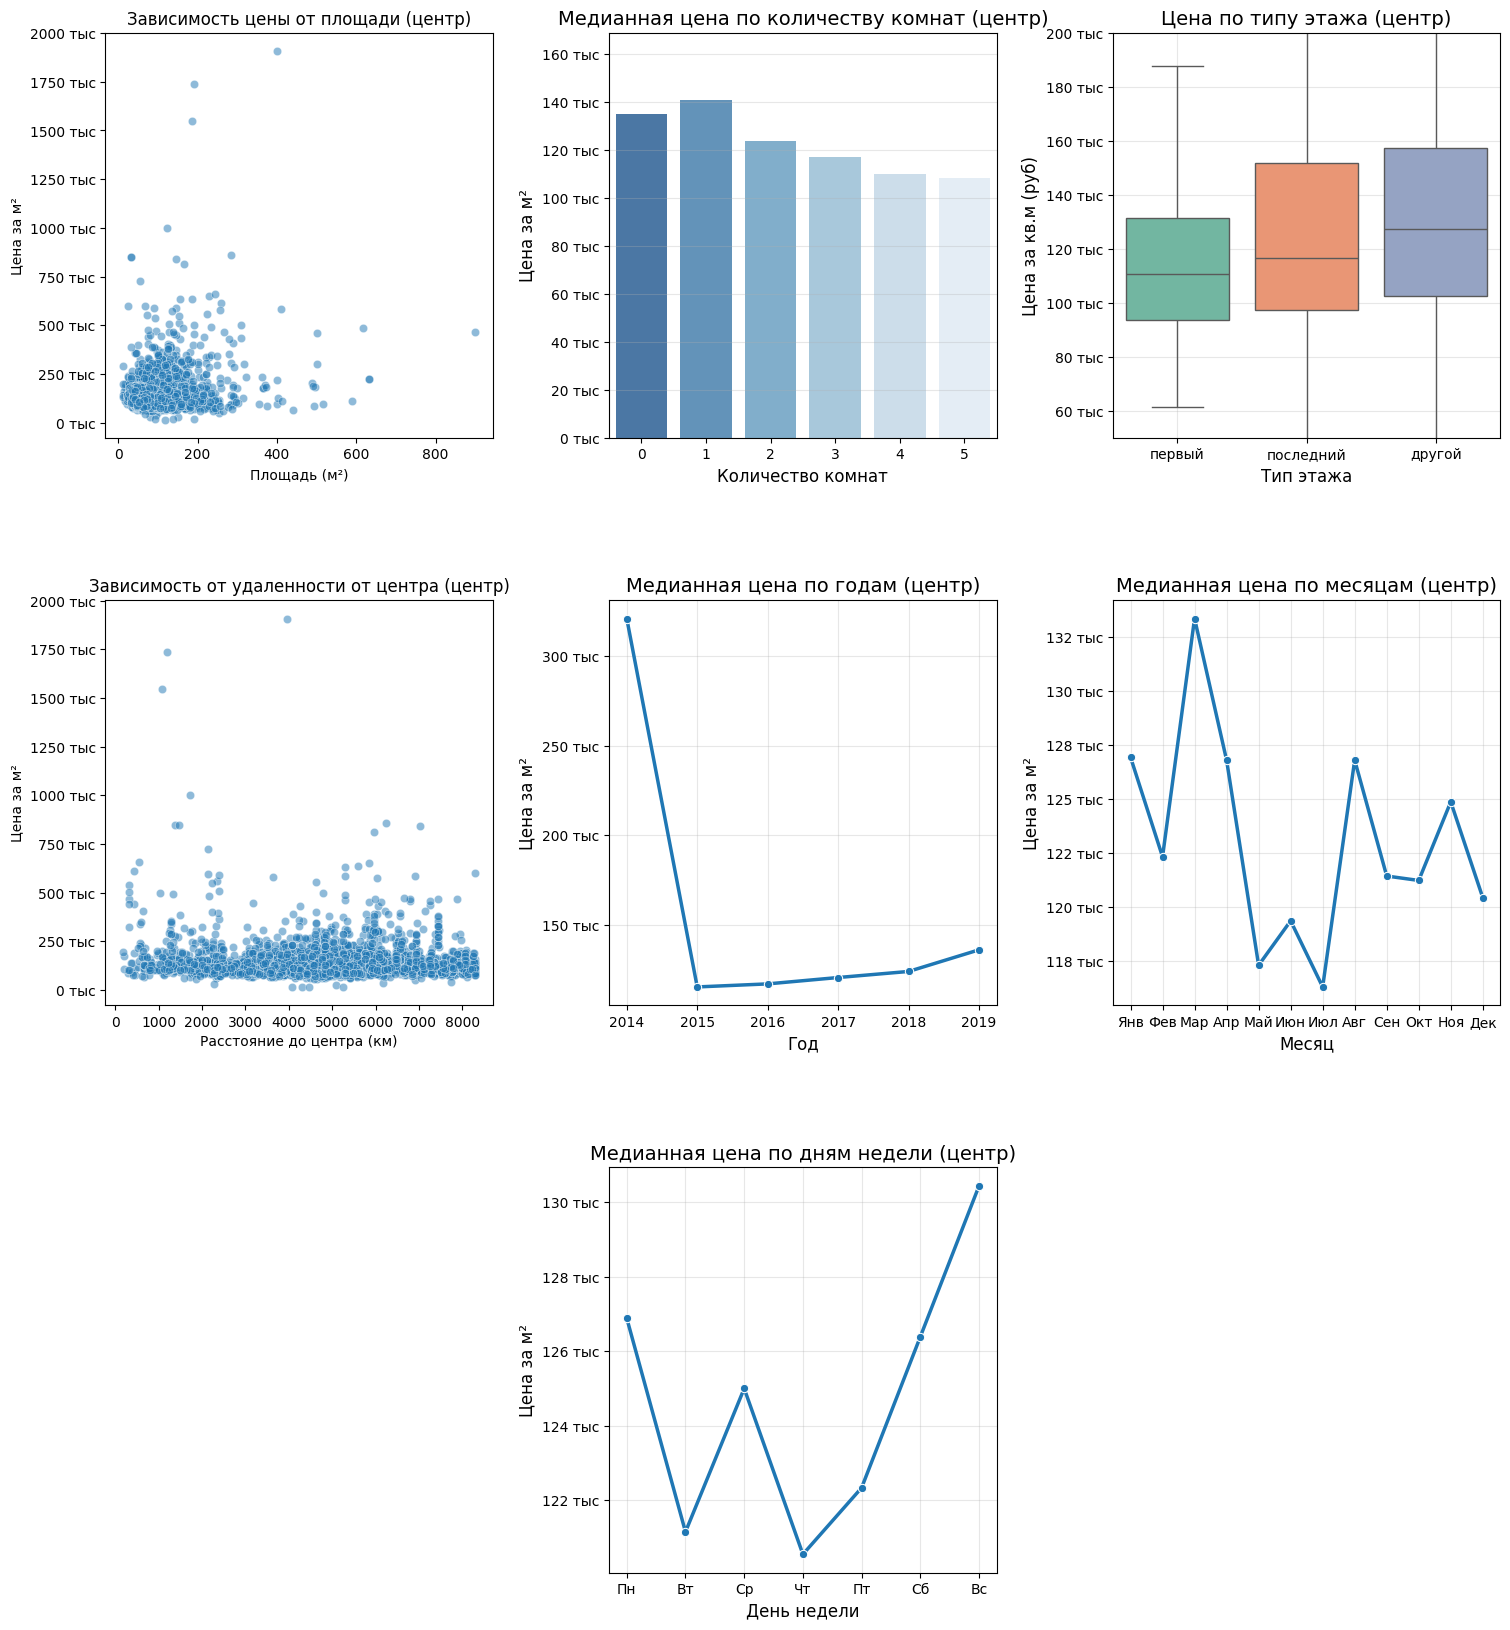

In [ ]:
# Фильтруем данные - только квартиры в пределах 8 км от центра
central_8km = df[df['cityCenters_nearest'] <= 8297].copy()

# Создаем фигуру с сеткой
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.3)

# 1. Зависимость цены от площади (центр)
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(x='total_area', y='price_per_area', data=central_8km, alpha=0.5, ax=ax1)
ax1.set_title('Зависимость цены от площади (центр)')
ax1.set_xlabel('Площадь (м²)')
ax1.set_ylabel('Цена за м²')
corr_area, _ = pearsonr(central_8km['total_area'], central_8km['price_per_area'])
ax1.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 2. Зависимость цены от количества комнат (центр)
ax2 = fig.add_subplot(gs[0, 1])
# Группируем данные
room_medians = central_8km[central_8km['rooms'] <= 5].groupby('rooms')['price_per_area'].median().reset_index()
# Строим столбчатую диаграмму
sns.barplot(x='rooms', y='price_per_area', data=room_medians,
           palette='Blues_r', alpha=0.8, ax=ax2)

ax2.set_title('Медианная цена по количеству комнат (центр)', fontsize=14)
ax2.set_xlabel('Количество комнат', fontsize=12)
ax2.set_ylabel('Цена за м²', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
ax2.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")
ax2.set_ylim(0, room_medians['price_per_area'].max() * 1.2)

# 3. Цена по типу этажа (центр)
ax3 = fig.add_subplot(gs[0, 2])
sns.boxplot(
    x='floor_type',
    y='price_per_area',
    data=central_8km,
    order=['первый', 'последний', 'другой'],
    palette='Set2',
    showfliers=False,
    ax=ax3
)
ax3.set_title('Цена по типу этажа (центр)', fontsize=14)
ax3.set_xlabel('Тип этажа', fontsize=12)
ax3.set_ylabel('Цена за кв.м (руб)', fontsize=12)
ax3.set_ylim(50_000, 200_000)
ax3.grid(True, alpha=0.3)
ax3.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 4. Зависимость от удаленности от центра (центр)
ax4 = fig.add_subplot(gs[1, 0])
sns.scatterplot(x='cityCenters_nearest', y='price_per_area', data=central_8km, alpha=0.5, ax=ax4)
ax4.set_title('Зависимость от удаленности от центра (центр)')
ax4.set_xlabel('Расстояние до центра (км)')
ax4.set_ylabel('Цена за м²')
corr_dist, _ = spearmanr(central_8km['cityCenters_nearest'], central_8km['price_per_area'])
ax4.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 5. Зависимость от года (центр)
ax5 = fig.add_subplot(gs[1, 1])
year_medians = central_8km.groupby('year')['price_per_area'].median().reset_index()
sns.lineplot(x='year', y='price_per_area', data=year_medians,
            marker='o', linewidth=2.5, ax=ax5)
ax5.set_title('Медианная цена по годам (центр)', fontsize=14)
ax5.set_xlabel('Год', fontsize=12)
ax5.set_ylabel('Цена за м²', fontsize=12)
ax5.grid(True, alpha=0.3)
ax5.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 6. Зависимость от месяца (центр)
ax6 = fig.add_subplot(gs[1, 2])
month_medians = central_8km.groupby('month')['price_per_area'].median().reset_index()
sns.lineplot(x='month', y='price_per_area', data=month_medians,
            marker='o', linewidth=2.5, sort=False, ax=ax6)
ax6.set_xticks(month_order)
ax6.set_xticklabels(['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек'])
ax6.set_title('Медианная цена по месяцам (центр)', fontsize=14)
ax6.set_xlabel('Месяц', fontsize=12)
ax6.set_ylabel('Цена за м²', fontsize=12)
ax6.grid(True, alpha=0.3)
ax6.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# 7. Зависимость от дня недели (центр)
ax7 = fig.add_subplot(gs[2, 1])
weekday_medians = central_8km.groupby('weekday')['price_per_area'].median().reset_index()
sns.lineplot(x='weekday', y='price_per_area', data=weekday_medians,
            marker='o', linewidth=2.5, ax=ax7)
ax7.set_xticks(day_order)
ax7.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
ax7.set_title('Медианная цена по дням недели (центр)', fontsize=14)
ax7.set_xlabel('День недели', fontsize=12)
ax7.set_ylabel('Цена за м²', fontsize=12)
ax7.grid(True, alpha=0.3)
ax7.yaxis.set_major_formatter(lambda x, pos: f"{x/1000:.0f} тыс")

# Удаляем пустые сублоты
fig.delaxes(fig.add_subplot(gs[2, 0]))
fig.delaxes(fig.add_subplot(gs[2, 2]))

plt.savefig('central_zone.png', dpi=300)
plt.show()

## Общий вывод

Для `всех` квартир:

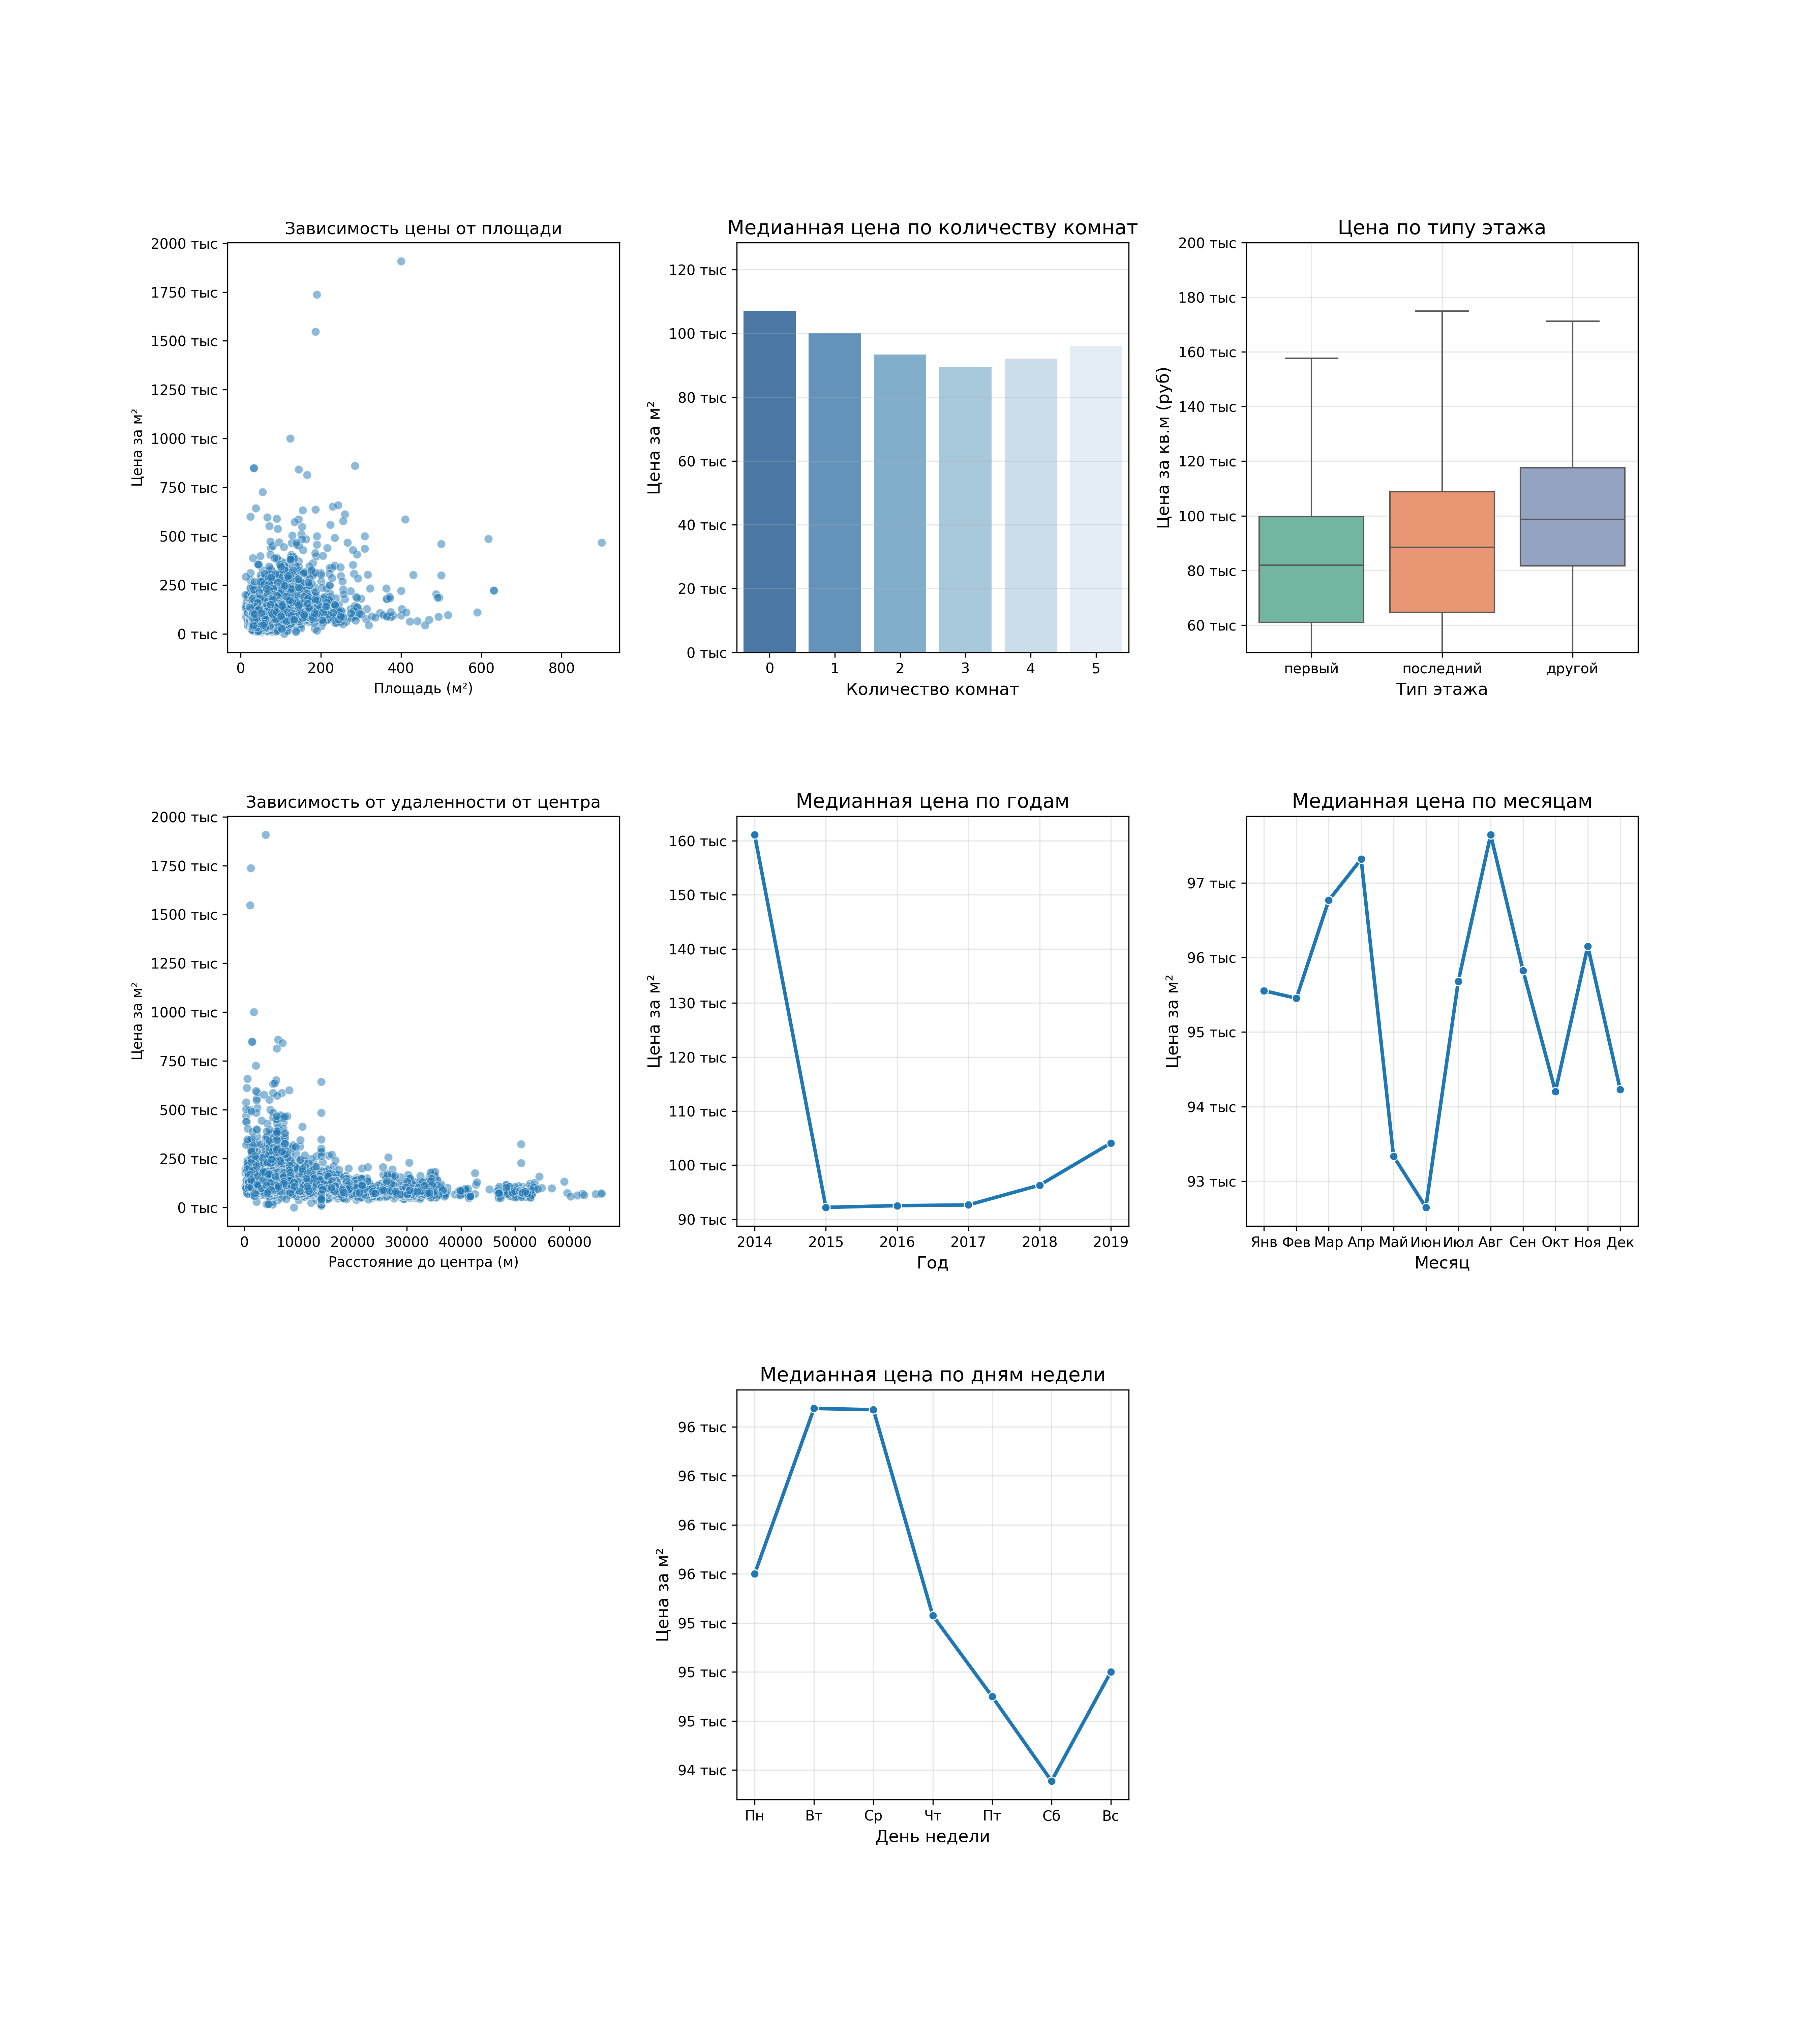

Можем выделить некоторые `особенности`:

*   Просадок в стоимости на 2 тысячи в субботу
*   Просадок в стоимости в мае-июне
*   Резкое падение в цене в 2015 году
*   Уменьшение в цене при удалении до центра
*   Первый этаж является самым дешевым, последний этаж чуть дороже первого, но дешевле остальных
*   Трехкомнатные квартиры самые дешевые, студии самые дорогие
*   У квартир площадью свыше 300 кв.м нет резких скачков в стоимости



Для квартир в `центре`:

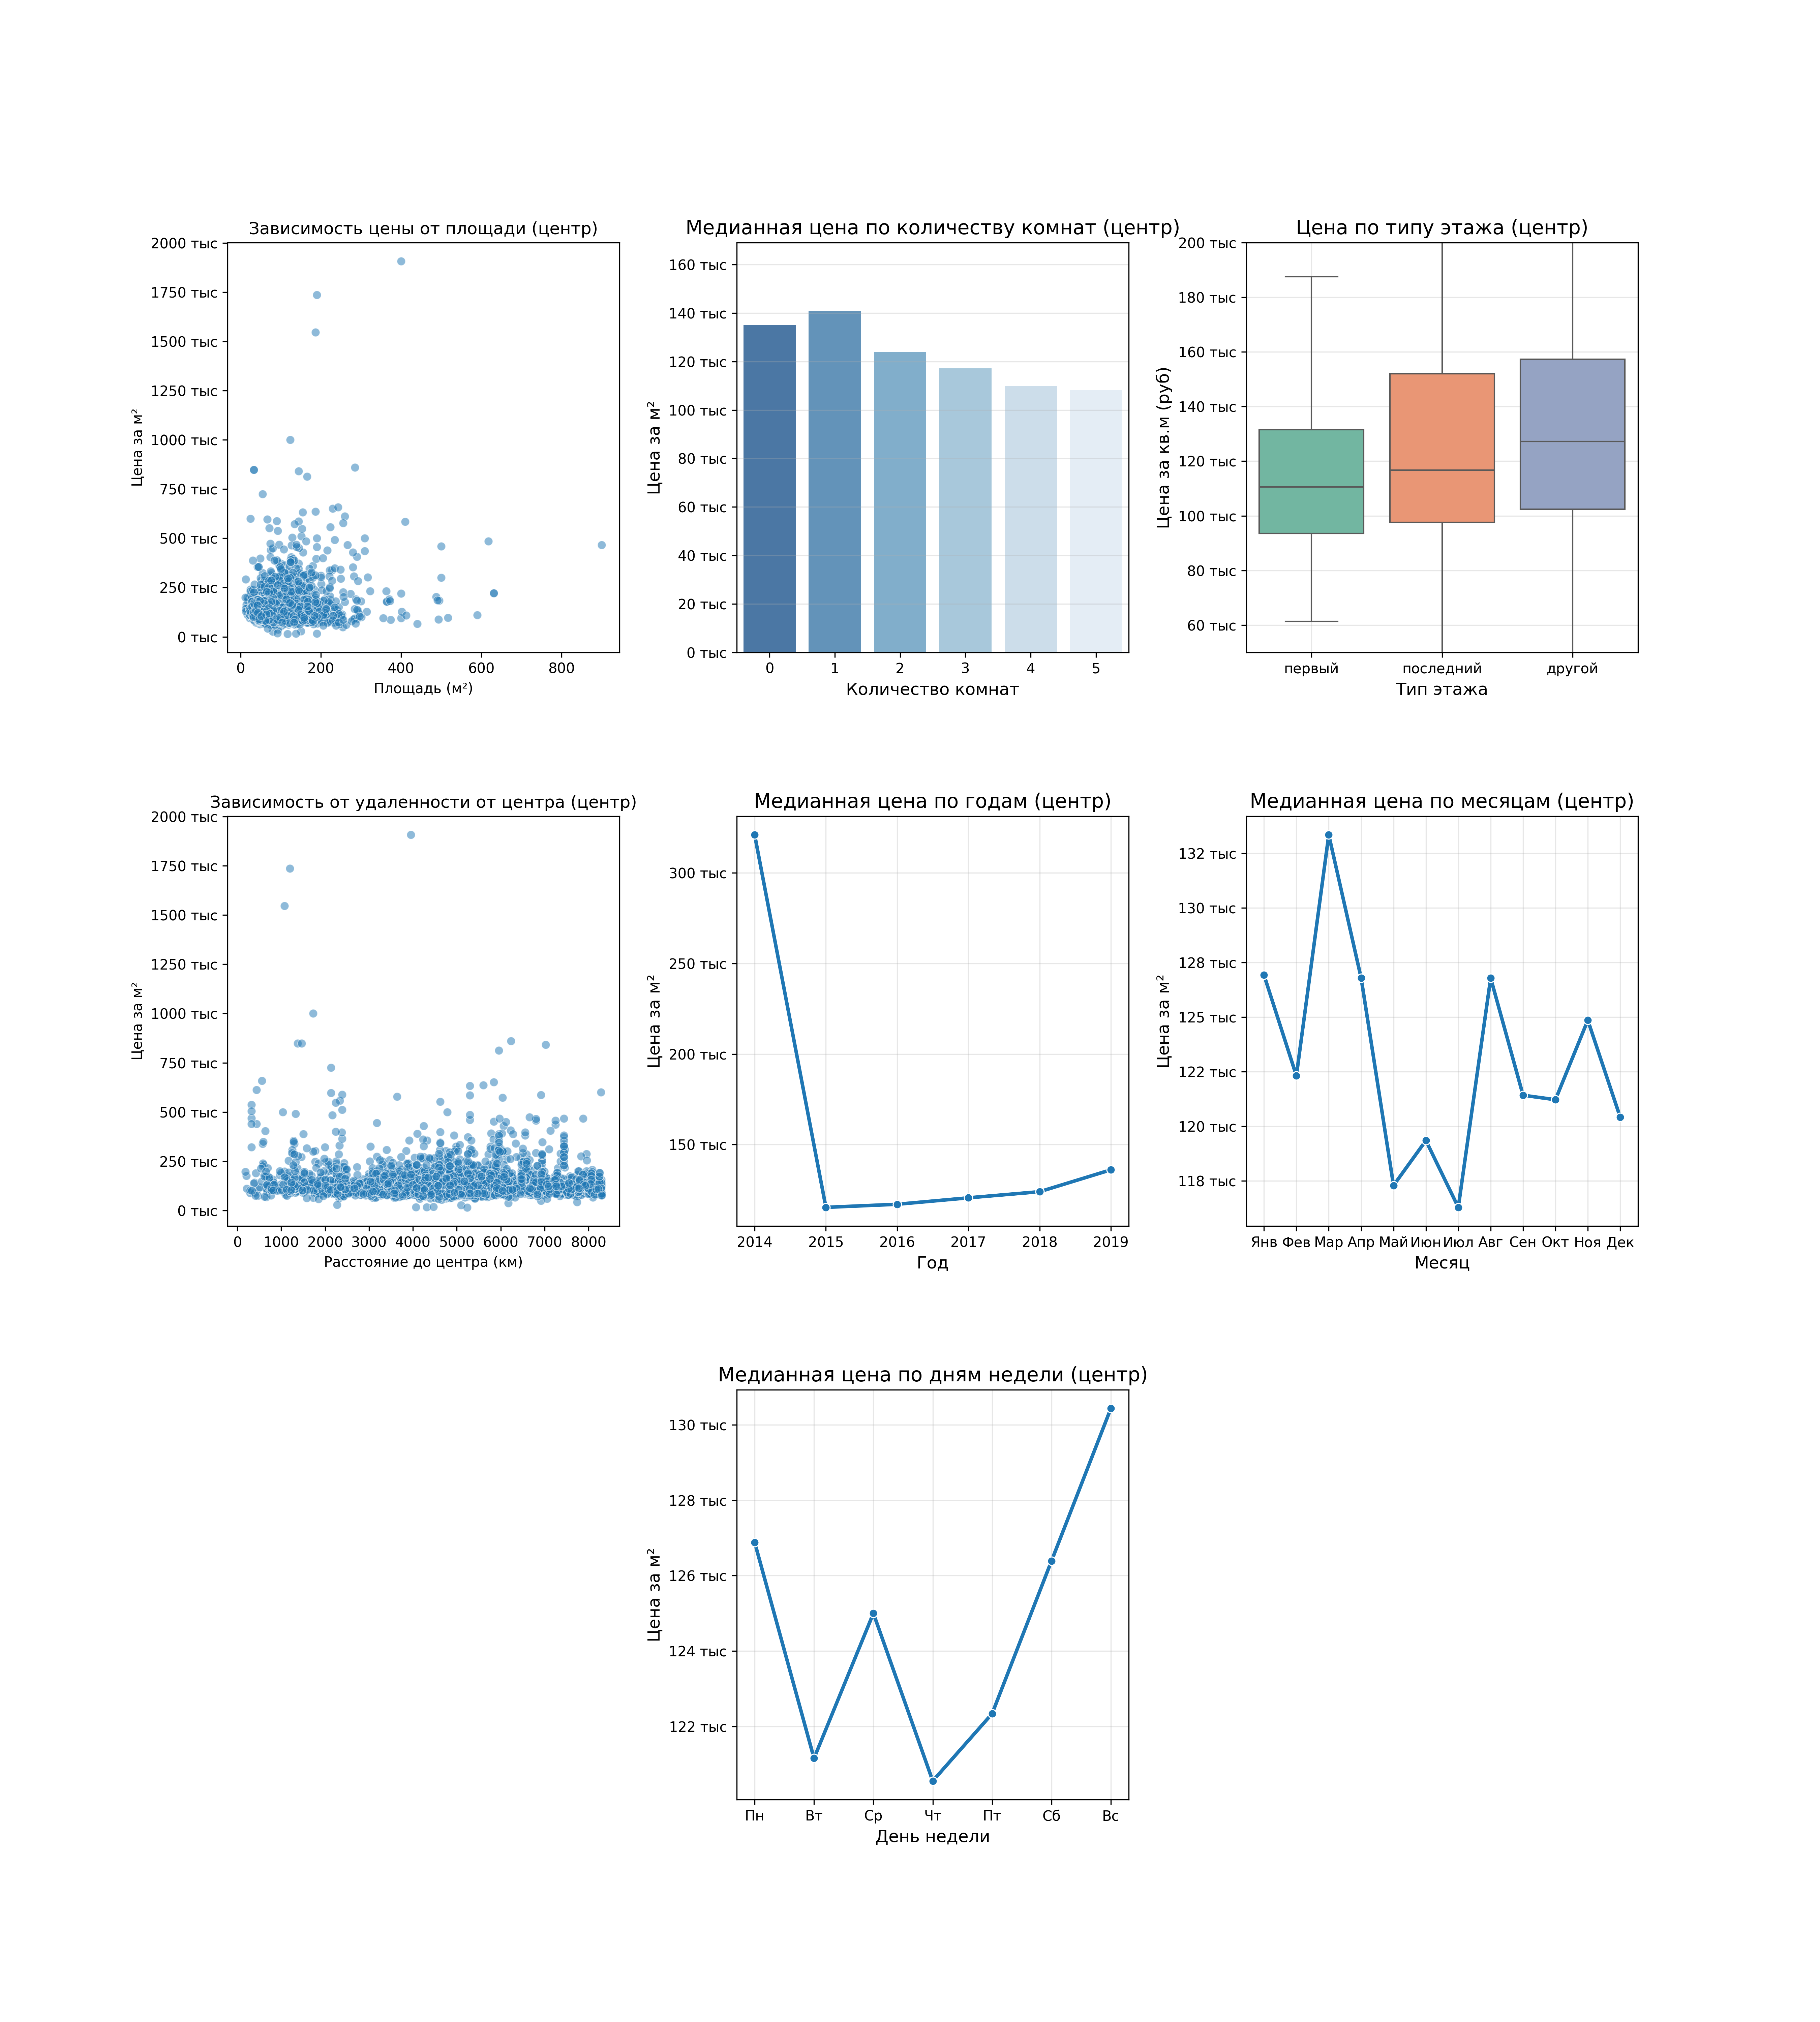

Для квартир в центре `подтверждается`:

*   Просадок в стоимости в мае-июне, но в июле просадок продолжается
*   Резкое падение в цене в 2015 году
*   Первый этаж также является самым дешевым, последний этаж чуть дороже первого, но дешевле остальных
*   У квартир площадью свыше 300 кв.м нет резких скачков в стоимости

`Особенности` для квартир в центре:

*   В выходные дни наблюдается резкие скачки в стоимости, после просадок во вторник, четверг и пятницу
*   Относительно центра квартиры не варьируются в цене
*   Однокомнатные квартиры самые дорогие, самые дешевые - пятикомнатные



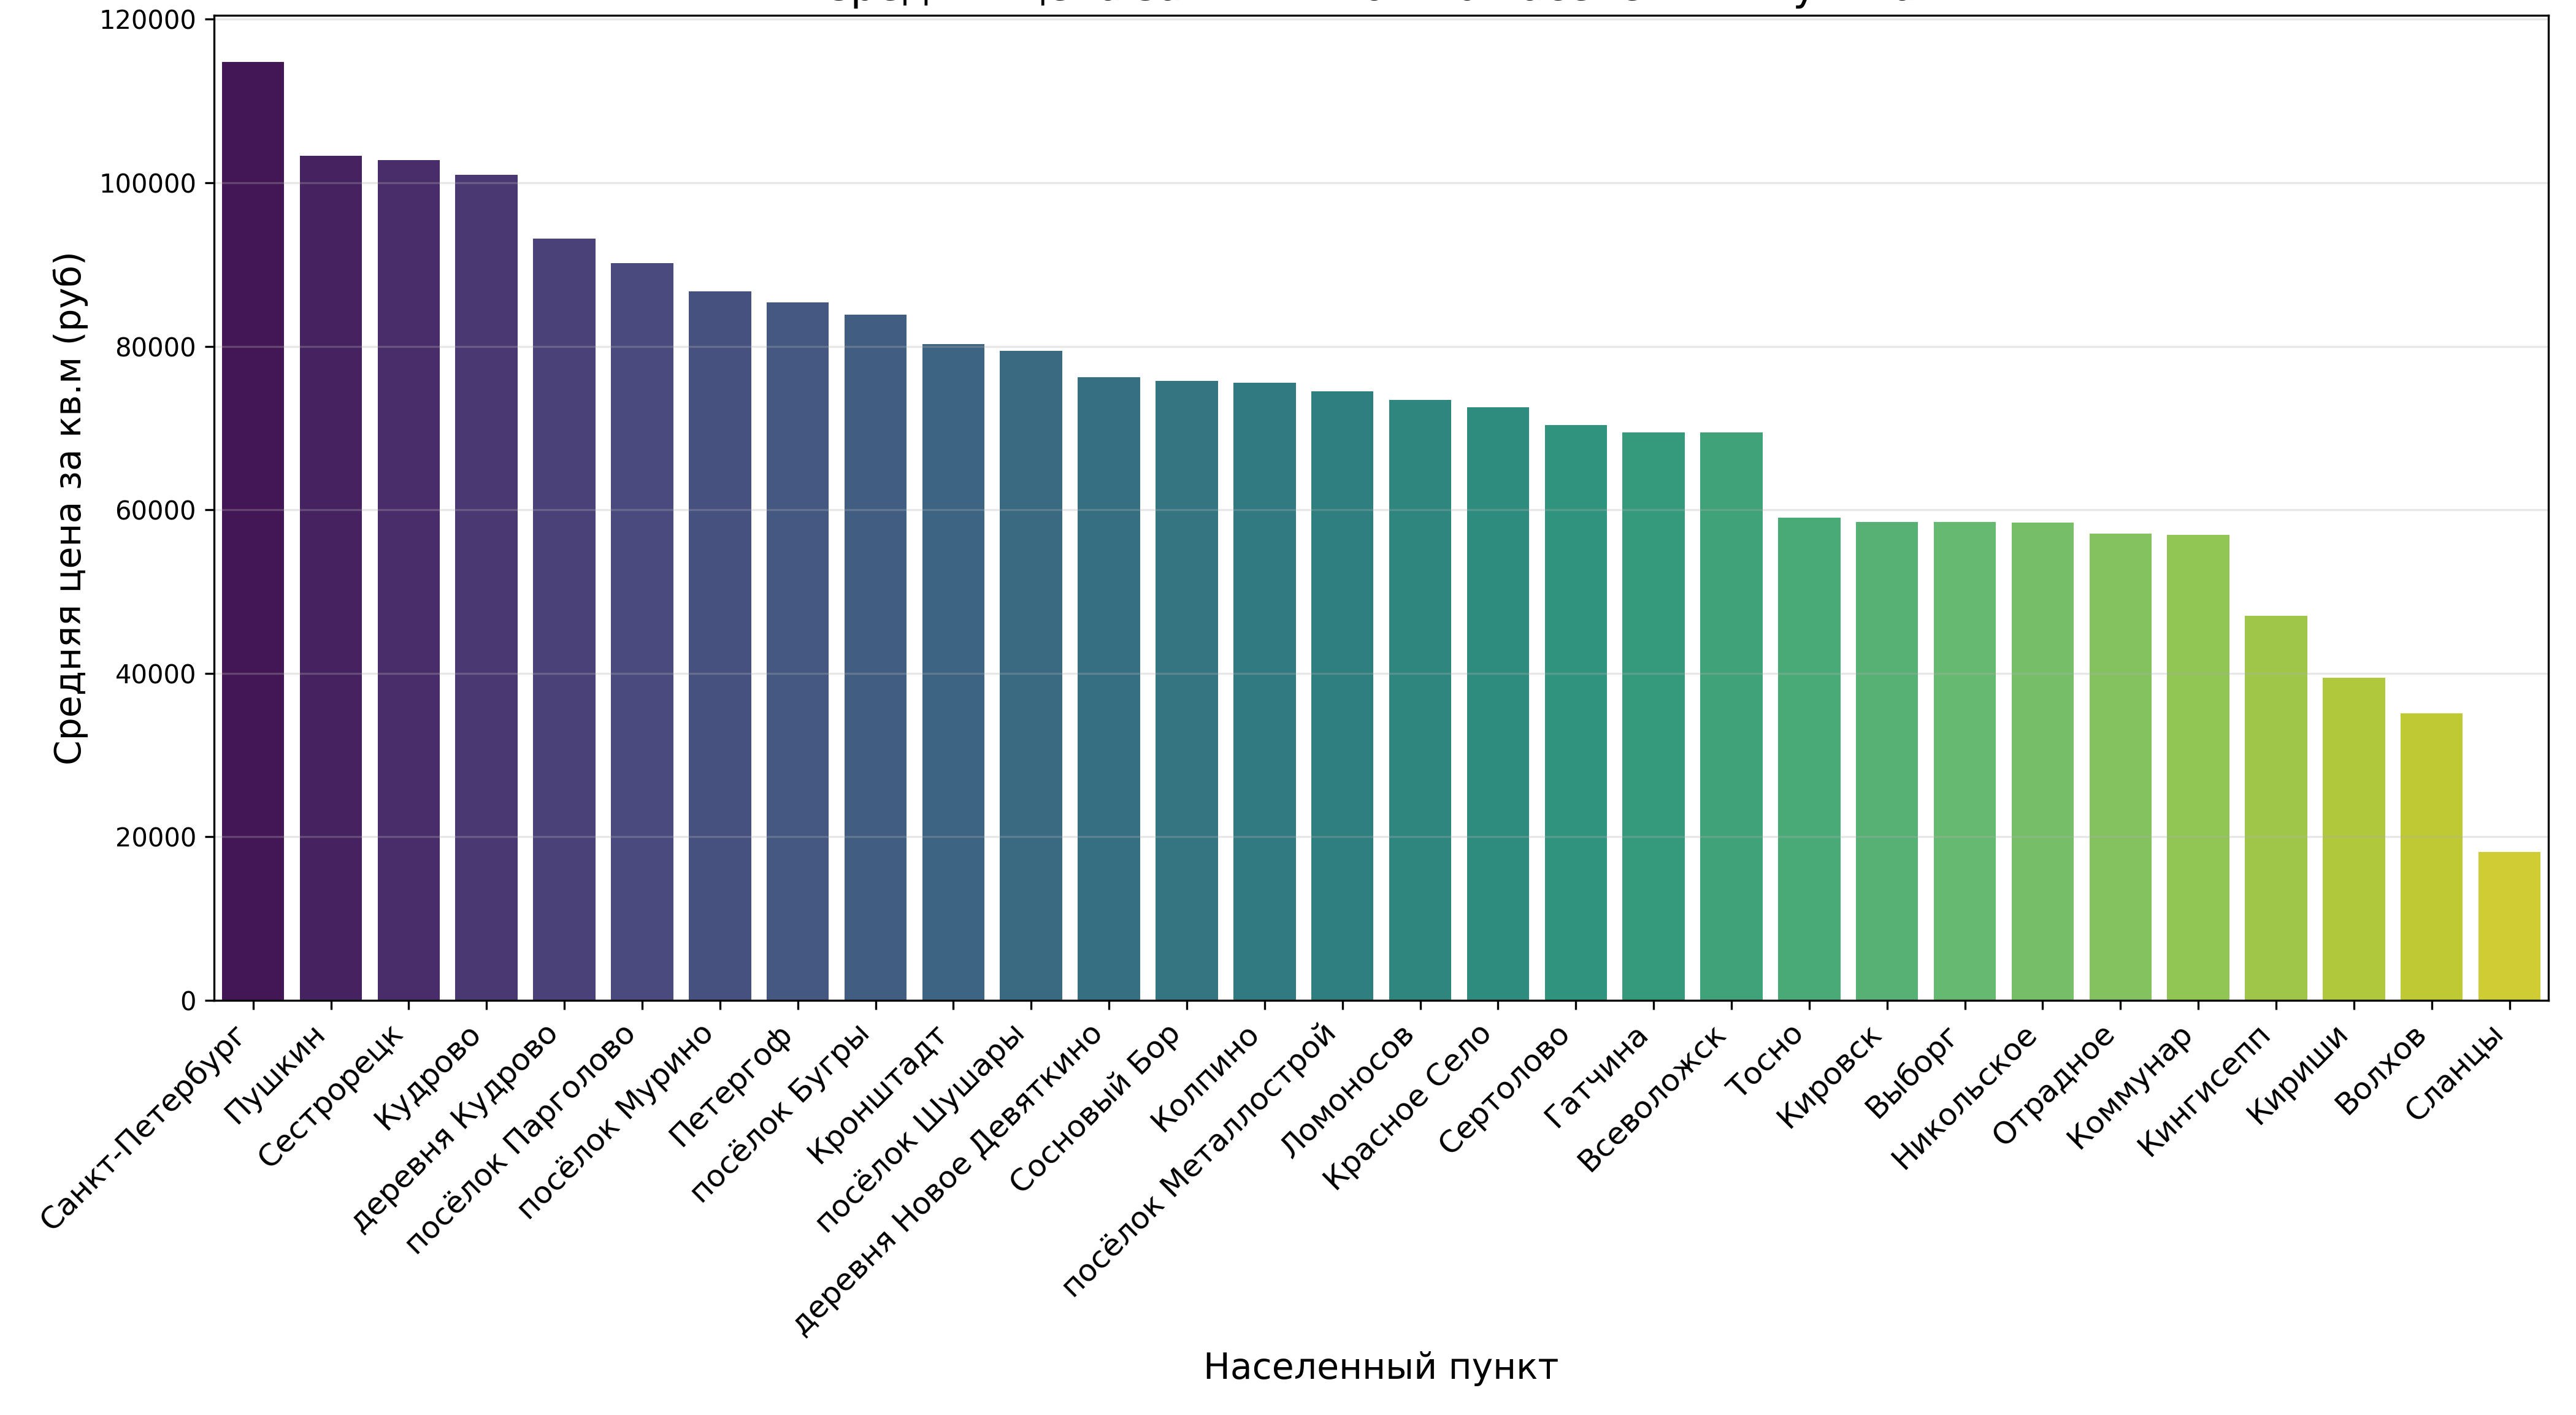

Насаленные пункты с самыми `дорогими` квартирами:

1.   Санкт-Петербург
2.   Пушкин
3.   деревня Кудрово

Насаленные пункты с самыми `дешевыми` квартирами:


1.   Сланцы
2.   Волхов
3.   Кириши





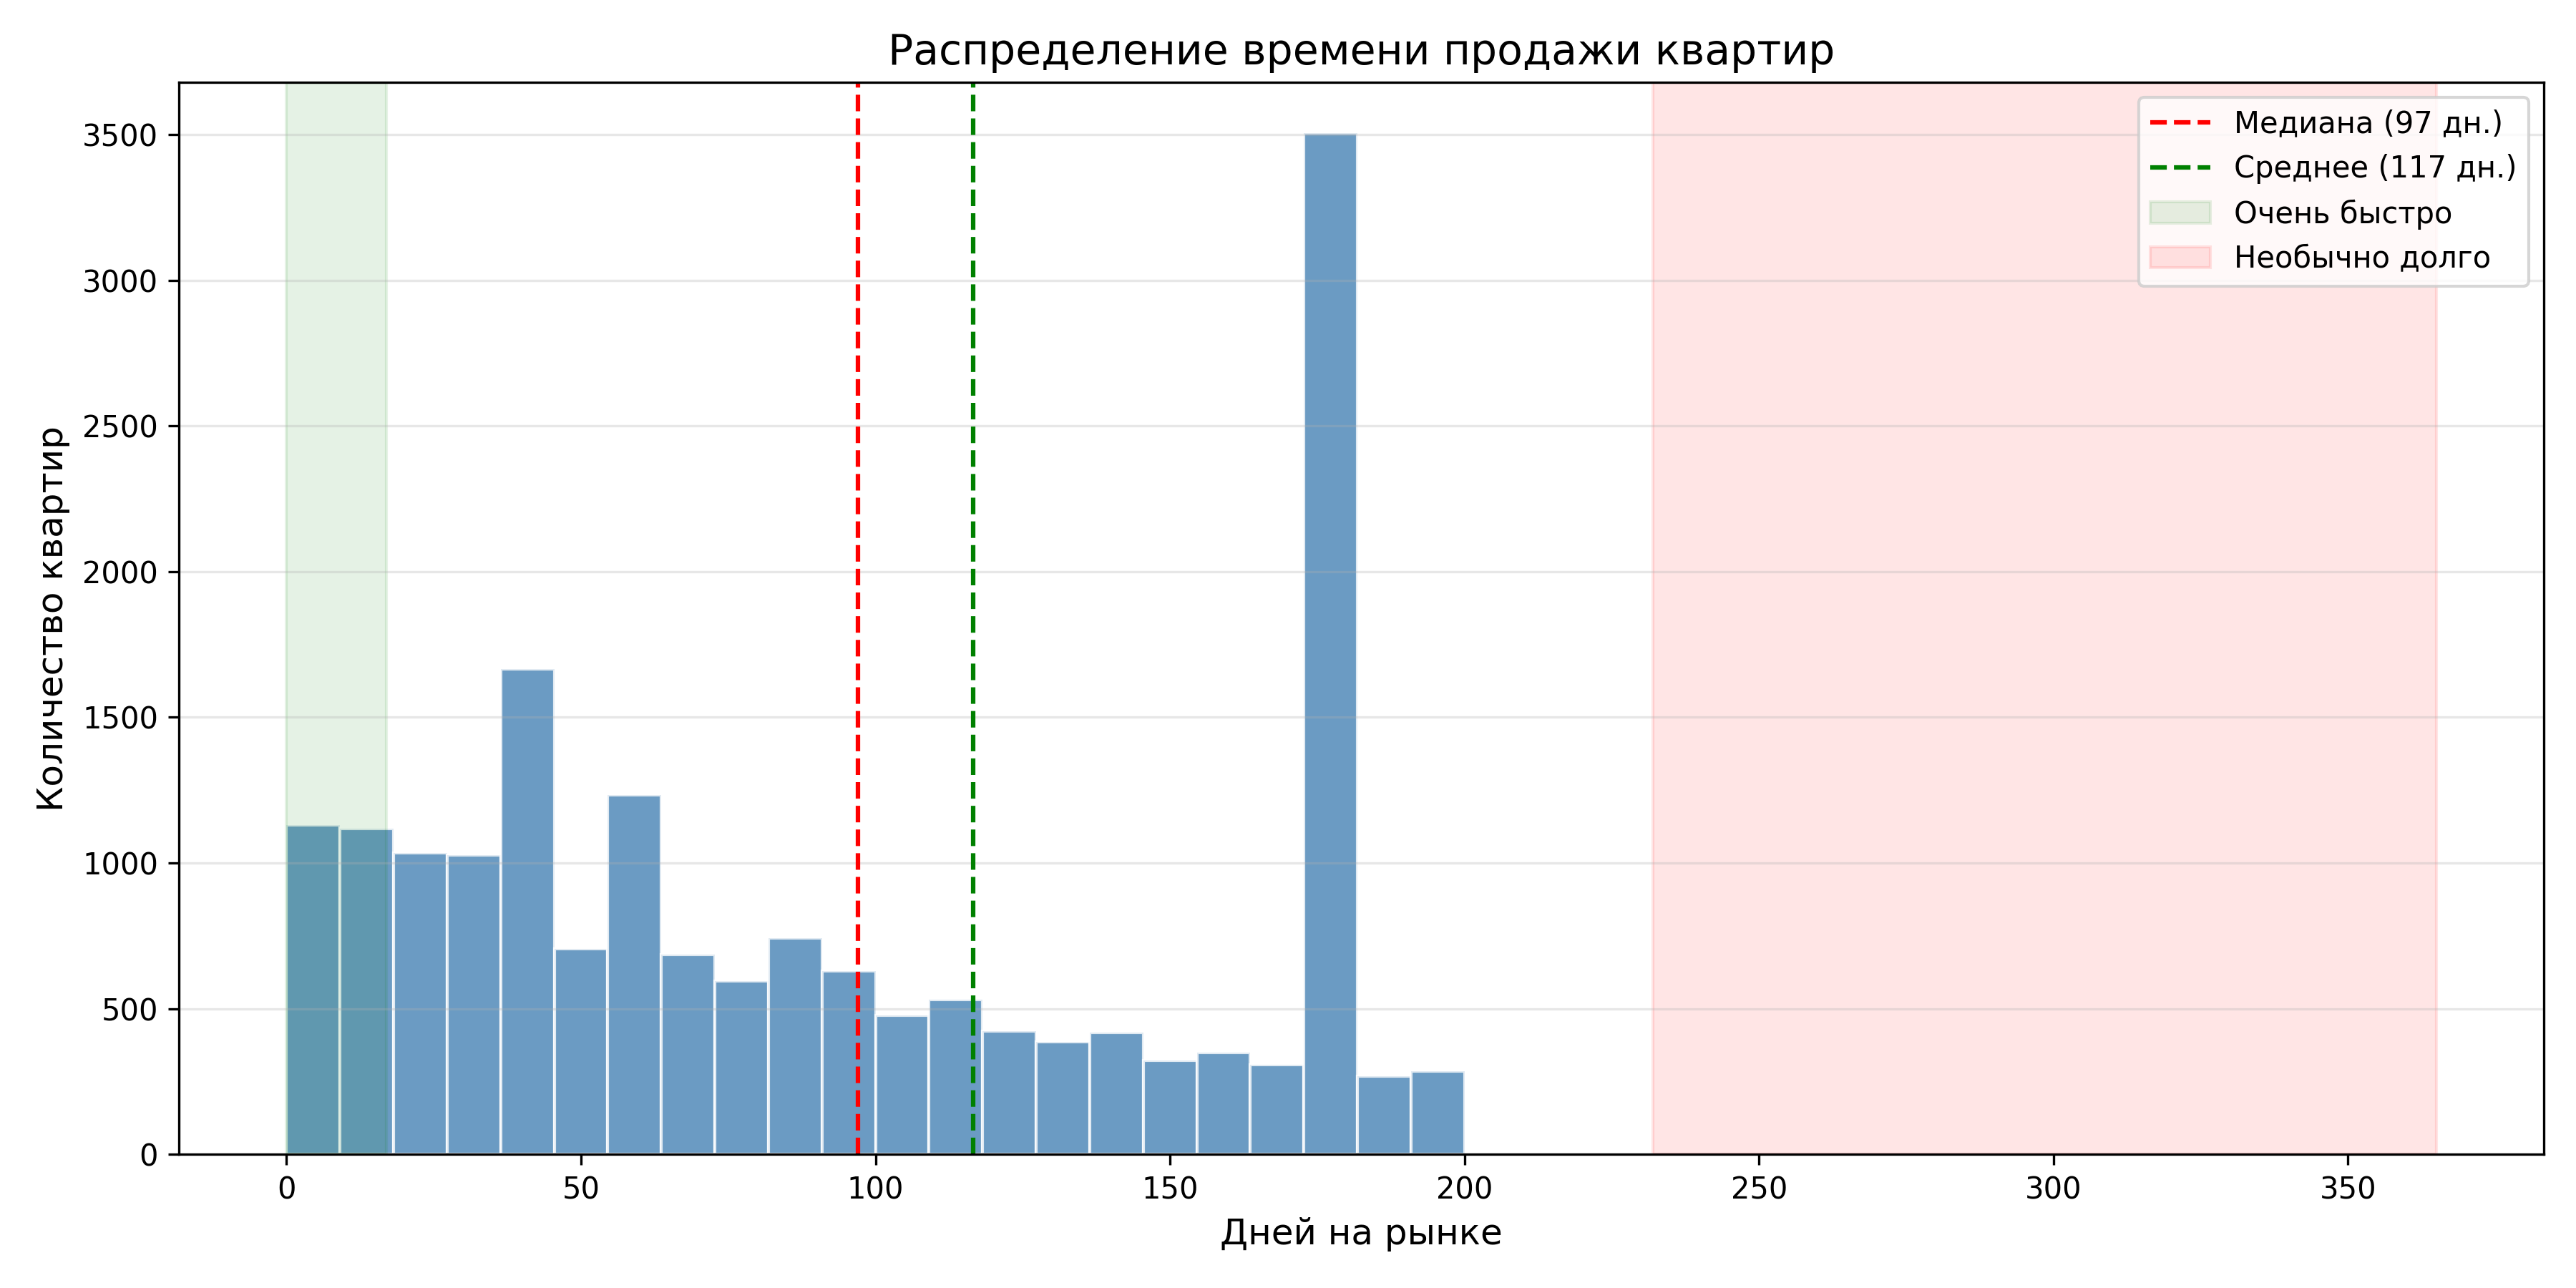

Среднее время продажи: `116.6 дней`

Медианное время продажи: `97.0 дней`

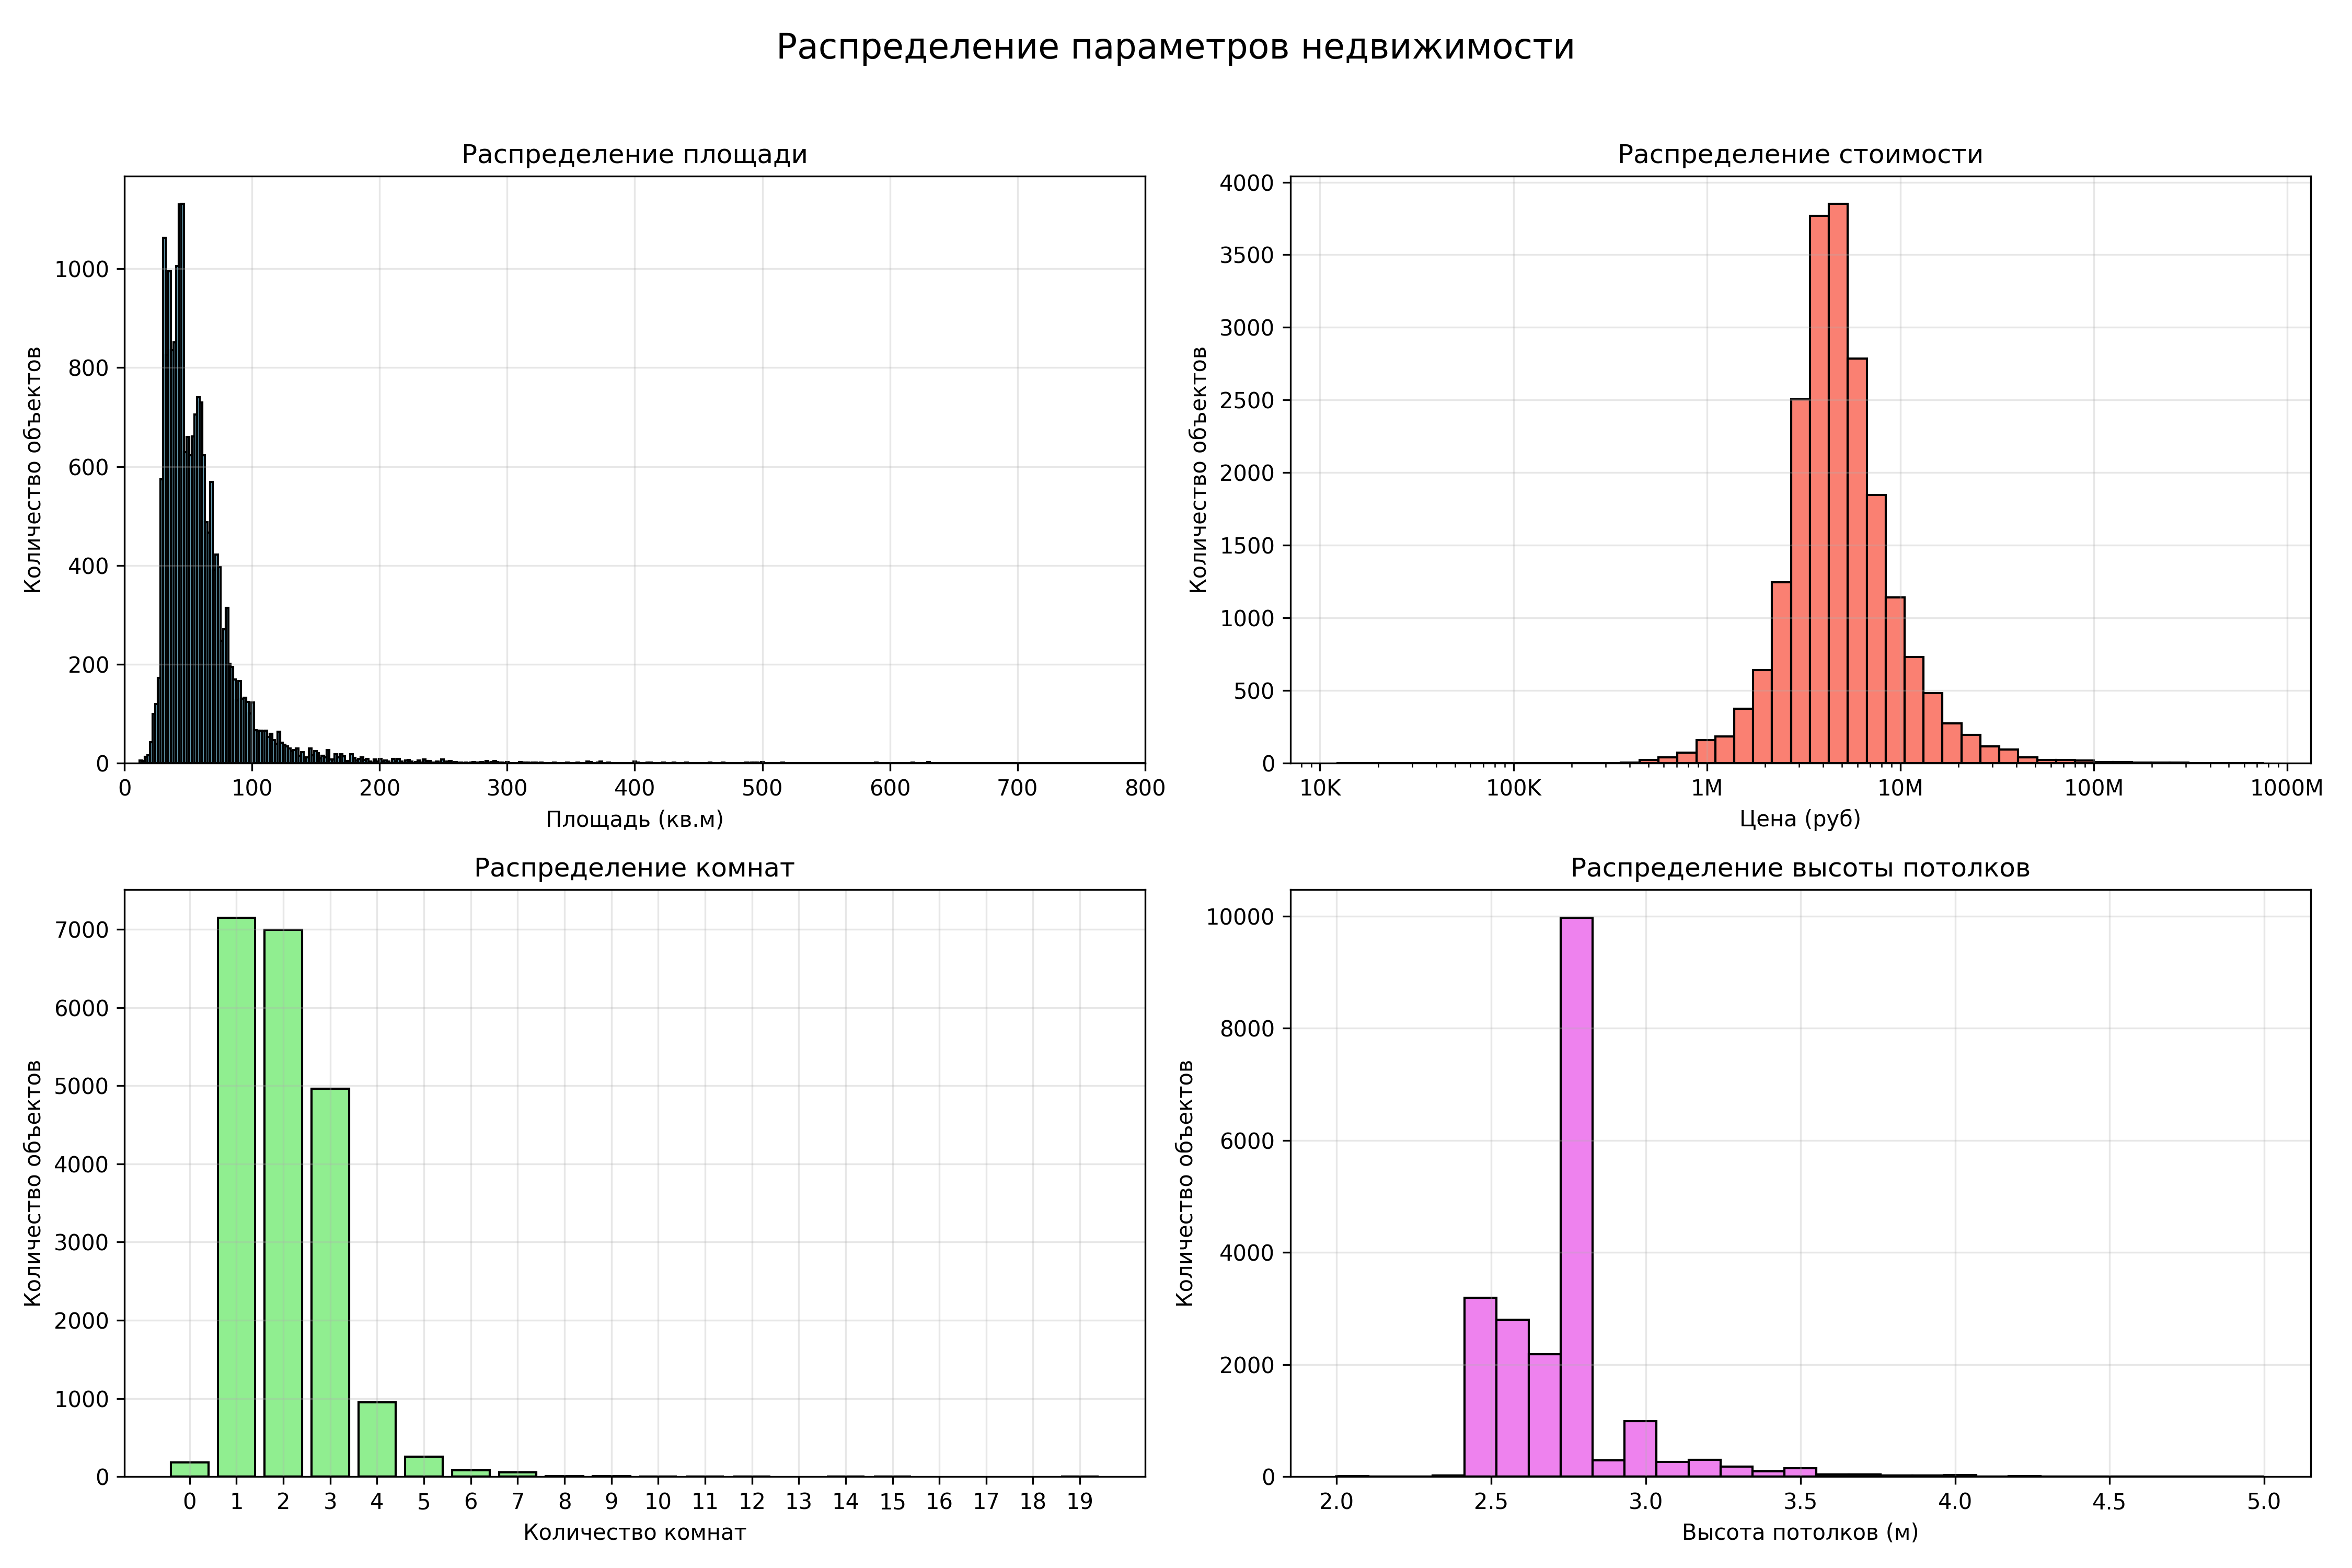

Средняя площадь квартир составляется примерно `30-100 кв.м`.

Средняя стоимость квартир варьируется в пределах `2-10 млн. рублей`.

Чаще всего встречаются `1-3 комнатные` квартиры.

Высота потолков составляет `2.5-2.7 метров`.